## 1.Setup Basic Parameters

In [13]:
import json
import numpy as np
import pandas as pd


# Step 1: Load and read the JSON file to extract new parameters

# Path to the JSON file with new parameters
json_path = '../data/FrenchP_scenario1.json'

# Read the JSON file
with open(json_path, 'r') as file:
    parameters = json.load(file)

# Display the loaded parameters to confirm
parameters

{'Tmax': 60,
 'D': 26,
 'L': 1,
 'ls': 0,
 'le': 0,
 'α': 0.6,
 'β': 0.2,
 'γ': 0.3,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World_AP,Tahiti_AP': 300,
  'Outside World_FP,Tahiti_FP': 300,
  'Bora Bora_AP,Fakarava_AP': 57,
  'Bora Bora_AP,Huahine_AP': 237,
  'Bora Bora_AP,Maupiti_AP': 38,
  'Bora Bora_AP,Moorea_AP': 199,
  'Bora Bora_AP,Raiatea_AP': 379,
  'Bora Bora_AP,Rangiroa_AP': 133,
  "Bora Bora_FP,Taha'a_FP": 193,
  'Bora Bora_AP,Tikehau_AP': 76,
  'Moorea_AP,Huahine_AP': 75,
  'Moorea_FP,Huahine_FP': 96,
  'Moorea_AP,Raiatea_AP': 57,
  'Nuku Hiva_AP,Hiva Oa_AP': 104,
  'Nuku Hiva_AP,Ua Huka_AP': 123,
  'Nuku Hiva_AP,Ua Pou_AP': 161,
  'Raiatea_AP,Huahine_AP': 341,
  'Raiatea_FP,Huahine_FP': 192,
  'Raiatea_AP,Maupiti_AP': 133,
  'Raiatea_AP,Rangiroa_AP': 9,
  "Raiatea_FP,Taha'a_FP": 193,
  'Raiatea_AP,Tikehau_AP': 9,
  'Rangiroa_AP,Fakarava_AP': 85,
  'Rangiroa_AP,Mataiva_AP': 19,
  'Rangiroa_AP,Tikehau_AP': 104,
  'Rurutu_AP,Rimatara_AP': 38,
  'Rurutu_AP,

In [14]:
# Parameters
Tmax = parameters['Tmax'] #time frame
D = parameters['D']  # Number of locations
L = parameters['L']  # Number of locations connected to the outside world
reduction_factor = parameters['reduction_factor'] #percentage of people who will be connected is there is a lockdown
Tmax, D, L, reduction_factor

(60, 26, 1, 0.0)

## 2. Create Connectivity Matrix W

In [15]:
def extract_locations(parameters):
    # This function extracts all unique locations from the keys of the connectivity matrix in the order they appear
    locations_ordered = []
    seen_locations = set()
    for key in parameters['Connectivity Matrix W'].keys():
        # Split the key on the comma
        places = key.split(',')
        for place in places:
            place_cleaned = place.strip()
            if place_cleaned not in seen_locations:
                seen_locations.add(place_cleaned)
                locations_ordered.append(place_cleaned)
    return locations_ordered

def create_index_mapping(locations):
    # This function creates a dictionary that maps location names to indices
    return {location: index for index, location in enumerate(locations)}

def create_connectivity_matrix(parameters, location_to_index):
    D = len(location_to_index)  # The number of locations
    W = np.zeros((D, D), dtype=int)  # Initialize the connectivity matrix with zeros

    # Populate the connectivity matrix using the index mapping
    for key, value in parameters['Connectivity Matrix W'].items():
        places = key.split(',')
        i = location_to_index[places[0].strip()]
        j = location_to_index[places[1].strip()]
        W[i, j] = value

    # Make the matrix symmetrical
    W = W + W.T

    # Ensure the diagonal is zero
    np.fill_diagonal(W, 0)
    return W

# Extract locations in the order they appear in the JSON file
locations_ordered = extract_locations(parameters)

# Create a mapping from location names to indices
location_to_index = create_index_mapping(locations_ordered)

# Create the connectivity matrix
W = create_connectivity_matrix(parameters, location_to_index)

# Create a DataFrame from the connectivity matrix with the ordered locations
W_df = pd.DataFrame(W, index=locations_ordered, columns=locations_ordered)

W_df

Outside World_AP  Tahiti_AP  Outside World_FP  Tahiti_FP  \
Outside World_AP                 0        300                 0          0   
Tahiti_AP                      300          0                 0          0   
Outside World_FP                 0          0                 0        300   
Tahiti_FP                        0          0               300          0   
Bora Bora_AP                     0       2238                 0          0   
Fakarava_AP                      0        218                 0          0   
Huahine_AP                       0          0                 0          0   
Maupiti_AP                       0        284                 0          0   
Moorea_AP                        0        296                 0          0   
Raiatea_AP                       0       1717                 0          0   
Rangiroa_AP                      0        726                 0          0   
Bora Bora_FP                     0          0                 0          0   
Taha'a_FP                        0          0                 0          0   
Tikehau_AP                       0        171                 0          0   
Moorea_FP                        0          0                 0       4773   
Huahine_FP                       0          0                 0         96   
Nuku Hiva_AP                     0        325                 0          0   
Hiva Oa_AP                       0        306                 0          0   
Ua Huka_AP                       0        114                 0          0   
Ua Pou_AP                        0        123                 0          0   
Raiatea_FP                       0          0                 0          0   
Mataiva_AP                       0         76                 0          0   
Rurutu_AP                        0        227                 0          0   
Rimatara_AP                      0         38                 0          0   
Tubuai_AP                        0        246                 0          0   
Ahe_AP                           0         95                 0          0   
Arutua_AP                        0         95                 0          0   
Gambier_AP                       0         95                 0          0   
Hao_AP                           0        133                 0          0   
Makemo_AP                        0        104                 0          0   
Manihi_AP                        0         95                 0          0   
Raivavae_AP                      0         76                 0          0   

                  Bora Bora_AP  Fakarava_AP  Huahine_AP  Maupiti_AP  \
Outside World_AP             0            0           0           0   
Tahiti_AP                 2238          218           0         284   
Outside World_FP             0            0           0           0   
Tahiti_FP                    0            0           0           0   
Bora Bora_AP                 0           57         237          38   
Fakarava_AP                 57            0           0           0   
Huahine_AP                 237            0           0           0   
Maupiti_AP                  38            0           0           0   
Moorea_AP                  199            0          75           0   
Raiatea_AP                 379            0         341         133   
Rangiroa_AP                133           85           0           0   
Bora Bora_FP                 0            0           0           0   
Taha'a_FP                    0            0           0           0   
Tikehau_AP                  76            9           0           0   
Moorea_FP                    0            0           0           0   
Huahine_FP                   0            0           0           0   
Nuku Hiva_AP                 0            0           0           0   
Hiva Oa_AP                   0            0           0           0   
Ua Huka_AP                   0            0           0           0   
Ua Pou_AP              

In [16]:
#Initialize n_per_community with the values of 'n' from the JSON file
n_per_community = parameters['n']

In [17]:
# Print all values of 'n' for each population
for community, n_value in n_per_community.items():
    print(f'{community}: {n_value}')

Outside World: 313600
Ahe: 490
Arutua: 1736
Bora Bora: 10758
Fakarava: 1679
Gambier: 1570
Hao: 1227
Hiva Oa: 2371
Huahine: 6263
Makemo: 1391
Manihi: 1138
Mataiva: 292
Maupiti: 1302
Moorea: 18201
Nuku Hiva: 3025
Raiatea: 12388
Raivavae: 900
Rangiroa: 3761
Rimatara: 893
Rurutu: 2163
Taha'a: 5296
Tahiti: 191779
Tikehau: 589
Tubuai: 2185
Ua Huka: 719
Ua Pou: 2168


In [18]:
# Reverse mapping of ports to communities to facilitate grouping by community in the connectivity matrix.
port_to_community = {}
for community, ports in parameters['ports_according_communities'].items():
    for port in ports:
        port_to_community[port] = community

# Initialize the community connectivity matrix
community_names = list(parameters['ports_according_communities'].keys())
community_index = {name: i for i, name in enumerate(community_names)}
community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)

# Fill the matrix based on the connections between ports, grouping by communities.
for (port_from_to, passengers) in parameters['Connectivity Matrix W'].items():
    port_from, port_to = port_from_to.split(',')
    community_from = port_to_community[port_from.strip()]
    community_to = port_to_community[port_to.strip()]
    i = community_index[community_from]
    j = community_index[community_to]
    community_connectivity[i, j] += passengers
    community_connectivity[j, i] += passengers  # Assuming bidirectional connection

# Convert community connectivity matrix to DataFrame for better visualization.
community_connectivity_df = pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

community_connectivity_df

Outside World  Ahe  Arutua  Bora Bora  Fakarava  Gambier  Hao  \
Outside World              0    0       0          0         0        0    0   
Ahe                        0    0       0          0         0        0    0   
Arutua                     0    0       0          0         0        0    0   
Bora Bora                  0    0       0          0        57        0    0   
Fakarava                   0    0       0         57         0        0    0   
Gambier                    0    0       0          0         0        0    0   
Hao                        0    0       0          0         0        0    0   
Hiva Oa                    0    0       0          0         0        0    0   
Huahine                    0    0       0        237         0        0    0   
Makemo                     0    0       0          0         0        0    0   
Manihi                     0    0       0          0         0        0    0   
Mataiva                    0    0       0          0         0        0    0   
Maupiti                    0    0       0         38         0        0    0   
Moorea                     0    0       0        199         0        0    0   
Nuku Hiva                  0    0       0          0         0        0    0   
Raiatea                    0    0       0        379         0        0    0   
Raivavae                   0    0       0          0         0        0    0   
Rangiroa                   0    0       0        133        85        0    0   
Rimatara                   0    0       0          0         0        0    0   
Rurutu                     0    0       0          0         0        0    0   
Taha'a                     0    0       0        193         0        0    0   
Tahiti                   600   95      95       2238       218       95  133   
Tikehau                    0    0       0         76         9        0    0   
Tubuai                     0    0       0          0         0        0    0   
Ua Huka                    0    0       0          0         0        0    0   
Ua Pou                     0    0       0          0         0        0    0   

               Hiva Oa  Huahine  Makemo  ...  Raivavae  Rangiroa  Rimatara  \
Outside World        0        0       0  ...         0         0         0   
Ahe                  0        0       0  ...         0         0         0   
Arutua               0        0       0  ...         0         0         0   
Bora Bora            0      237       0  ...         0       133         0   
Fakarava             0        0       0  ...         0        85         0   
Gambier              0        0       0  ...         0         0         0   
Hao                  0        0       0  ...         0         0         0   
Hiva Oa              0        0       0  ...         0         0         0   
Huahine              0        0       0  ...         0         0         0   
Makemo               0        0       0  ...         0         0         0   
Manihi               0        0       0  ...         0         0         0   
Mataiva              0        0       0  ...         0        19         0   
Maupiti              0        0       0  ...         0         0         0   
Moorea               0      171       0  ...         0         0         0   
Nuku Hiva          104        0       0  ...         0         0         0   
Raiatea              0      533       0  ...         0         9         0   
Raivavae             0        0       0  ...         0         0         0   
Rangiroa             0        0       0  ...         0         0         0   
Rimatara             0        0       0  ...         0         0         0   
Rurutu               0        0       0  ...         0         0        38   
Taha'a               0        0       0  ...         0         0         0   
Tahiti             306       96     104  ...        76       726        38   
Tikehau              0        0       0  ...         0      

## 3.Initialize State Vectors

In [19]:
def initialize_state_vectors(parameters):
    # Retrieve community data and standard percentages
    n_per_community = parameters['n'].copy()
    communities_ordered = list(n_per_community.keys())
    percentages_standard = np.array(parameters['percentages_standard'])
    percentages_outside_world = np.array(parameters['percentages_outside_world'])

    # Initialize the state vectors
    x = np.zeros((len(communities_ordered), 4), dtype=int)  # Use integer for state vectors
    
    # Set up state vectors for each community
    for i, community in enumerate(communities_ordered):
        n = n_per_community[community]  # Population of the community
        if community == "Outside World":
            # Use specific percentages for the "Outside World"
            x[i] = np.round(percentages_outside_world * n).astype(int)
        else:
            # Use standard percentages for domestic communities
            x[i] = np.round(percentages_standard * n).astype(int)

    # Convert the state vectors to a DataFrame for better visualization
    state_vectors_df = pd.DataFrame(x, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'],
                                    index=communities_ordered)

    return state_vectors_df, communities_ordered

In [20]:
state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
x = state_vectors_df.values 

In [21]:
state_vectors_df

Susceptible  Exposed  Infected  Recovered
Outside World       188160    47040     47040      31360
Ahe                    392       24        24         49
Arutua                1389       87        87        174
Bora Bora             8606      538       538       1076
Fakarava              1343       84        84        168
Gambier               1256       78        78        157
Hao                    982       61        61        123
Hiva Oa               1897      119       119        237
Huahine               5010      313       313        626
Makemo                1113       70        70        139
Manihi                 910       57        57        114
Mataiva                234       15        15         29
Maupiti               1042       65        65        130
Moorea               14561      910       910       1820
Nuku Hiva             2420      151       151        302
Raiatea               9910      619       619       1239
Raivavae               720       45        45         90
Rangiroa              3009      188       188        376
Rimatara               714       45        45         89
Rurutu                1730      108       108        216
Taha'a                4237      265       265        530
Tahiti              153423     9589      9589      19178
Tikehau                471       29        29         59
Tubuai                1748      109       109        218
Ua Huka                575       36        36         72
Ua Pou                1734      108       108        217

## 4. Lockdown Logic

In [22]:
def update_community_connectivity_df(W_df, ports_according_communities, port_to_community):
    community_names = list(ports_according_communities.keys())
    community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)
    
    community_index = {name: i for i, name in enumerate(community_names)}
    
    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = community_index[community_from]
                    j = community_index[community_to]
                    community_connectivity[i, j] += W_df.loc[port_from, port_to]
    
    return pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

def apply_lockdown_and_update(lockdown_ports, reduction_factor):
    global W_df, community_connectivity_df
    W_df = original_W_df.copy()  # Restore W_df to its original state before lockdown
    
    for port in lockdown_ports:
        connected_ports = W_df[port].index.tolist()
        W_df.loc[port, connected_ports] *= reduction_factor
        W_df.loc[connected_ports, port] *= reduction_factor
    
    community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [23]:
# Applying changes
original_W_df = W_df.copy()
lockdown_ports = parameters['lockdown_ports']
apply_lockdown_and_update(lockdown_ports, reduction_factor)

community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [24]:
community_connectivity_df

Outside World  Ahe  Arutua  Bora Bora  Fakarava  Gambier  Hao  \
Outside World              0    0       0          0         0        0    0   
Ahe                        0    0       0          0         0        0    0   
Arutua                     0    0       0          0         0        0    0   
Bora Bora                  0    0       0          0        57        0    0   
Fakarava                   0    0       0         57         0        0    0   
Gambier                    0    0       0          0         0        0    0   
Hao                        0    0       0          0         0        0    0   
Hiva Oa                    0    0       0          0         0        0    0   
Huahine                    0    0       0        237         0        0    0   
Makemo                     0    0       0          0         0        0    0   
Manihi                     0    0       0          0         0        0    0   
Mataiva                    0    0       0          0         0        0    0   
Maupiti                    0    0       0         38         0        0    0   
Moorea                     0    0       0        199         0        0    0   
Nuku Hiva                  0    0       0          0         0        0    0   
Raiatea                    0    0       0        379         0        0    0   
Raivavae                   0    0       0          0         0        0    0   
Rangiroa                   0    0       0        133        85        0    0   
Rimatara                   0    0       0          0         0        0    0   
Rurutu                     0    0       0          0         0        0    0   
Taha'a                     0    0       0        193         0        0    0   
Tahiti                   600   95      95       2238       218       95  133   
Tikehau                    0    0       0         76         9        0    0   
Tubuai                     0    0       0          0         0        0    0   
Ua Huka                    0    0       0          0         0        0    0   
Ua Pou                     0    0       0          0         0        0    0   

               Hiva Oa  Huahine  Makemo  ...  Raivavae  Rangiroa  Rimatara  \
Outside World        0        0       0  ...         0         0         0   
Ahe                  0        0       0  ...         0         0         0   
Arutua               0        0       0  ...         0         0         0   
Bora Bora            0      237       0  ...         0       133         0   
Fakarava             0        0       0  ...         0        85         0   
Gambier              0        0       0  ...         0         0         0   
Hao                  0        0       0  ...         0         0         0   
Hiva Oa              0        0       0  ...         0         0         0   
Huahine              0        0       0  ...         0         0         0   
Makemo               0        0       0  ...         0         0         0   
Manihi               0        0       0  ...         0         0         0   
Mataiva              0        0       0  ...         0        19         0   
Maupiti              0        0       0  ...         0         0         0   
Moorea               0      171       0  ...         0         0         0   
Nuku Hiva          104        0       0  ...         0         0         0   
Raiatea              0      533       0  ...         0         9         0   
Raivavae             0        0       0  ...         0         0         0   
Rangiroa             0        0       0  ...         0         0         0   
Rimatara             0        0       0  ...         0         0         0   
Rurutu               0        0       0  ...         0         0        38   
Taha'a               0        0       0  ...         0         0         0   
Tahiti             306       96     104  ...        76       726        38   
Tikehau              0        0       0  ...         0      

## 5. Implement the Migration Logic

In [25]:
def balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community):
    D = len(communities_ordered)
    Delta_out = np.zeros_like(x)  # Matrix of outgoing changes
    Delta_in = np.zeros_like(x)   # Matrix of incoming changes

    # Define a random state order for each pair of communities
    state_order = np.random.permutation(4)
    
    for i in range(D):  # For each community of origin
        for j in range(D):  # For each target community
            if i != j:
                migration_value = W_df.iloc[i, j]  # The connectivity of the W
                # Shuffle states for each migration event
                np.random.shuffle(state_order)
                for cat in state_order:  # Go through states in a random order
                    available_to_move = x[i, cat] - Delta_out[i, cat]
                    available_capacity = n_per_community[communities_ordered[j]] - np.sum(Delta_in[j])
                    moving_pop = min(migration_value, available_to_move, available_capacity)
                    
                    Delta_out[i, cat] += moving_pop
                    Delta_in[j, cat] += moving_pop

                    # Reduce the migration value by the number of people who have moved
                    migration_value -= moving_pop
                    # If migration_value is 0, no more people can be moved
                    if migration_value <= 0:
                        break

    # Apply migration changes
    x_new = x - Delta_out + Delta_in

    # Ensure that there are no negative values
    x_new = np.clip(x_new, 0, None)

    return x_new

In [26]:
# Run the migration step
x_new = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)

# Now that x_new is defined, you can create a DataFrame and then print it.
x_new_df = pd.DataFrame(x_new, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])

In [27]:
x_new_df

Susceptible  Exposed  Infected  Recovered
Outside World       188363    47064     46764      31409
Ahe                    106       84       300          0
Arutua                1476       87         0        174
Bora Bora             7914      689       680       1474
Fakarava              1042      260       114        262
Gambier               1199       69       192        109
Hao                   1060       70        97          0
Hiva Oa               2068      119         0        185
Huahine               5205       57       374        626
Makemo                1016       57        90        229
Manihi                 900       19         0        219
Mataiva                249       15         0         29
Maupiti                899       65       208        130
Moorea               14646      976       825       1754
Nuku Hiva             3025        0         0          0
Raiatea               9910      427       715       1335
Raivavae               616        0        34        250
Rangiroa              2964      197       233        367
Rimatara               709        0        94         90
Rurutu                1884      189        25         64
Taha'a                4365      457       137        338
Tahiti              153442     9570      9589      19178
Tikehau                433       85         0         70
Tubuai                1786       71       109        218
Ua Huka                575       18        65         61
Ua Pou                1734      108       108        217

## 6. Implement Infection Dynamics

In [28]:
def infection_step(x_new, lockdown=False):
    # Defines rates of disease transmission, recovery and progression.
    α = parameters['α']  # The transmission rate
    β = parameters['β']  # Recovery rate
    γ = parameters['γ']  # Rate of progression of those exposed to infectious diseases

    # D is the total number of communities.
    D = x_new.shape[0]
    
    # Initializes an array to store the updated states after the infection step.
    x_updated = np.zeros_like(x_new)

    for i in range(D):
        # Calculates the total population of community i.
        n = x_new[i, :].sum()
        
        if n > 0:
            # Extracts the individual states for the community i.
            S, E, I, R = x_new[i, 0], x_new[i, 1], x_new[i, 2], x_new[i, 3]

            # Calculates transitions between states based on current rates and population.
            δ_SE = np.random.binomial(S, α*I/n if n > 0 else 0)  # Susceptibles that become exposed
            δ_EI = np.random.binomial(E, γ)  # Exposed who become infected
            δ_IR = np.random.binomial(I, β)  # Infected recovering

            # Updates the states for community i based on the calculated transitions.
            x_updated[i] = [S - δ_SE, E + δ_SE - δ_EI, I + δ_EI - δ_IR, R + δ_IR]
    
    return x_updated

## 7. Run the Simulation

In [29]:
def run_simulation(parameters, W_df, original_W_df):
    # Initialize state vectors and community connectivity
    state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
    x = state_vectors_df.to_numpy()  # Extract numpy array for use in simulation

    # Initialize history array to store the state for each day
    history = []

    # Retrieve specific parameters from parameters dictionary
    lockdown_start_day = parameters['ls']
    lockdown_duration = parameters['le']
    lockdown_ports = parameters['lockdown_ports']
    lockdown_end_day = lockdown_start_day + lockdown_duration

    # Simulation loop
    for day in range(parameters['Tmax']):
        # Apply lockdown
        if day == lockdown_start_day:
            apply_lockdown_and_update(lockdown_ports, reduction_factor)
            

        # End lockdown
        if day == lockdown_end_day + 1:
            W_df = original_W_df.copy()


        # Migration step only when not in lockdown
        if not (lockdown_start_day <= day <= lockdown_end_day):
            x = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)
        
        # Infection step happens every day
        x = infection_step(x, parameters)  # Pass parameters to infection_step to use rates

        # Record the state for the day t
        history.append(x.copy())

    return history

In [30]:
# Run the simulation
history = run_simulation(parameters, W_df, original_W_df)

In [31]:
# Convertir la lista de history en un DataFrame
days = [f"Day {i + 1}" for i in range(len(history))]
communities = communities_ordered
index = pd.MultiIndex.from_product([days, communities], names=['Day', 'Community'])
history_reshaped = np.vstack(history)  # Aplanar la lista de arrays en un único array
history_df = pd.DataFrame(history_reshaped, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], index=index)

In [32]:
history_df

Susceptible  Exposed  Infected  Recovered
Day    Community                                               
Day 1  Outside World       171331    49846     51605      40818
       Ahe                    378       30        29         52
       Arutua                1346      103        97        191
       Bora Bora             8353      640       567       1198
       Fakarava              1302      106        84        187
...                           ...      ...       ...        ...
Day 60 Tahiti               10956       34       153     180636
       Tikehau                  0        0         0        588
       Tubuai                 228        1         1       1954
       Ua Huka                 35        0         0        684
       Ua Pou                 133        0         1       2033

[1560 rows x 4 columns]

## 8. Tables

In [33]:
# Crear una lista para almacenar los datos
all_data = []

# Excluir comunidades "Outside World" para los cálculos
communities = [comm for comm in communities_ordered]

# Iterar sobre comunidades, excluyendo "Outside World"
for community in communities:
    # Extraer los datos para cada comunidad del DataFrame history_df
    community_data = history_df.xs(community, level='Community')

    # Calcular distribuciones porcentuales y redondear a dos decimales
    total_population_by_day = community_data.sum(axis=1).values.reshape(-1, 1)
    percentages = (community_data.values / total_population_by_day) * 100 if total_population_by_day.sum() else np.zeros_like(community_data.values)
    percentages = np.round(percentages, 2)  # Redondear a dos decimales

    # Combinar datos totales y porcentajes
    combined_data = np.hstack((community_data.values.astype(int), percentages))

    for day, day_data in enumerate(combined_data, start=1):
        all_data.append((community, day, *day_data))

# Las columnas ahora incluyen tanto totales como porcentajes
columns_combined = ['Community', 'Day', 'Susceptible', 'Exposed', 'Infected', 'Recovered', 'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']

# Convertir la lista en un DataFrame
all_communities_df = pd.DataFrame(all_data, columns=columns_combined)

# Configurar un índice múltiple basado en 'Community' y 'Day'
all_communities_df.set_index(['Community', 'Day'], inplace=True)

# Mostrar el DataFrame combinado
all_communities_df


Susceptible  Exposed  Infected  Recovered  Susceptible (%)  \
Community     Day                                                               
Outside World 1       171331.0  49846.0   51605.0    40818.0            54.63   
              2       154816.0  51741.0   55880.0    51163.0            49.37   
              3       138498.0  52626.0   60206.0    62270.0            44.16   
              4       122470.0  52965.0   63942.0    74223.0            39.05   
              5       107468.0  51729.0   67172.0    87231.0            34.27   
...                        ...      ...       ...        ...              ...   
Ua Pou        56         133.0      0.0       2.0     2032.0             6.14   
              57         133.0      0.0       1.0     2033.0             6.14   
              58         133.0      0.0       1.0     2033.0             6.14   
              59         133.0      0.0       1.0     2033.0             6.14   
              60         133.0      0.0       1.0     2033.0             6.14   

                   Exposed (%)  Infected (%)  Recovered (%)  
Community     Day                                            
Outside World 1          15.89         16.46          13.02  
              2          16.50         17.82          16.31  
              3          16.78         19.20          19.86  
              4          16.89         20.39          23.67  
              5          16.50         21.42          27.82  
...                        ...           ...            ...  
Ua Pou        56          0.00          0.09          93.77  
              57          0.00          0.05          93.82  
              58          0.00          0.05          93.82  
              59          0.00          0.05          93.82  
              60          0.00          0.05          93.82  

[1560 rows x 8 columns]

In [34]:
all_communities_df.to_excel("validacion22.xlsx", engine='openpyxl')

In [35]:
# Create a list to store both total numbers and percentages per day for all communities, excluding "Outside World".
country_data = []

# Exclude "Outside World" communities for calculations
filtered_communities = [c for c in communities_ordered if c != "Outside World"]
filtered_indices = [communities_ordered.index(c) for c in filtered_communities]

# Sum the states per day for all communities excluding "Outside World" and calculate percentages.
for day in range(parameters['Tmax']):
    # Convert the list of states for the day into a numpy array for better slicing
    day_array = np.array(history[day])  # Ensure history[day] is correctly converted to an array if not already
    day_data = day_array[filtered_indices, :].sum(axis=0).astype(int)  # Convert to integer here
    
    # Calculate the total population for this day (as integer).
    total_population = day_data.sum().astype(int)
    
    # Calculating percentages and rounding to two decimal places
    percentages = np.round((day_data / total_population) * 100, 2) if total_population > 0 else np.zeros(4)
    
    # Add both totals (already integers) and percentages to the list.
    country_data.append(np.concatenate((day_data.astype(np.float64), percentages)))  # Ensure concatenation as float

# Convert the list into a DataFrame
columns = ['Susceptible', 'Exposed', 'Infected', 'Recovered', 
           'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']
days = np.arange(1, parameters['Tmax'] + 1)
country_data_df = pd.DataFrame(country_data, columns=columns, index=days)
country_data_df.insert(0, 'Day', days)

# Display the resulting DataFrame
country_data_df

Day  Susceptible  Exposed  Infected  Recovered  Susceptible (%)  \
1     1     212828.0  16246.0   15077.0    30129.0            77.60   
2     2     205452.0  18464.0   17207.0    33157.0            74.91   
3     3     197973.0  20443.0   19244.0    36620.0            72.18   
4     4     189793.0  22391.0   21669.0    40427.0            69.20   
5     5     181078.0  24550.0   24137.0    44515.0            66.02   
6     6     171996.0  26328.0   26707.0    49249.0            62.71   
7     7     162652.0  27923.0   29111.0    54594.0            59.30   
8     8     152473.0  29782.0   31610.0    60415.0            55.59   
9     9     142097.0  30994.0   34199.0    66990.0            51.81   
10   10     132032.0  31900.0   36773.0    73575.0            48.14   
11   11     121378.0  32985.0   38944.0    80973.0            44.25   
12   12     111499.0  33000.0   40758.0    89023.0            40.65   
13   13     101710.0  32879.0   42748.0    96943.0            37.08   
14   14      92602.0  32025.0   44261.0   105392.0            33.76   
15   15      83901.0  31054.0   45020.0   114305.0            30.59   
16   16      76085.0  29676.0   44967.0   123552.0            27.74   
17   17      68711.0  28212.0   44832.0   132525.0            25.05   
18   18      61849.0  26528.0   44501.0   141402.0            22.55   
19   19      56285.0  24473.0   43257.0   150265.0            20.52   
20   20      51335.0  22213.0   41864.0   158868.0            18.72   
21   21      46871.0  20055.0   39854.0   167500.0            17.09   
22   22      42626.0  18258.0   38037.0   175359.0            15.54   
23   23      39380.0  16081.0   35563.0   183256.0            14.36   
24   24      36477.0  14200.0   33309.0   190294.0            13.30   
25   25      33977.0  12450.0   30962.0   196891.0            12.39   
26   26      31917.0  10769.0   28166.0   203428.0            11.64   
27   27      29925.0   9532.0   25797.0   209026.0            10.91   
28   28      28328.0   8451.0   23583.0   213918.0            10.33   
29   29      26994.0   7412.0   21450.0   218424.0             9.84   
30   30      25904.0   6309.0   19438.0   222629.0             9.44   
31   31      24843.0   5488.0   17164.0   226785.0             9.06   
32   32      24014.0   4676.0   15352.0   230238.0             8.76   
33   33      23548.0   4010.0   13677.0   233045.0             8.59   
34   34      22245.0   4001.0   12261.0   235773.0             8.11   
35   35      21944.0   3254.0   10857.0   238225.0             8.00   
36   36      21173.0   2918.0    9758.0   240431.0             7.72   
37   37      20427.0   2989.0    8543.0   242321.0             7.45   
38   38      20019.0   2454.0    7528.0   244279.0             7.30   
39   39      19681.0   2039.0    6674.0   245886.0             7.18   
40   40      19218.0   1771.0    6208.0   247083.0             7.01   
41   41      18925.0   1642.0    5353.0   248360.0             6.90   
42   42      18599.0   1422.0    4597.0   249662.0             6.78   
43   43      18288.0   1171.0    4113.0   250708.0             6.67   
44   44      18096.0    959.0    3586.0   251639.0             6.60   
45   45      17829.0    922.0    3093.0   252436.0             6.50   
46   46      17679.0    771.0    2741.0   253089.0             6.45   
47   47      17853.0    667.0    2322.0   253438.0             6.51   
48   48      17814.0    612.0    2054.0   253800.0             6.49   
49   49      17514.0    493.0    1781.0   254492.0             6.39   
50   50      17480.0    493.0    1550.0   254757.0             6.37   
51   51      17177.0    457.0    1571.0   255075.0             6.26   
52   52      17028.0    391.0    1269.0   255592.0             6.21   
53   53      17065.0    329.0    1136.0   255750.0             6.22   
54   54      16771.0    341.0    1158.0   256010.0             6.11   
55   55      16943.0    266.0     914.0   256157.0             6.18   
56   56      16692.0    321.

In [36]:
all_communities_df.to_excel("validacion32.xlsx", engine='openpyxl')

## 9. Plot

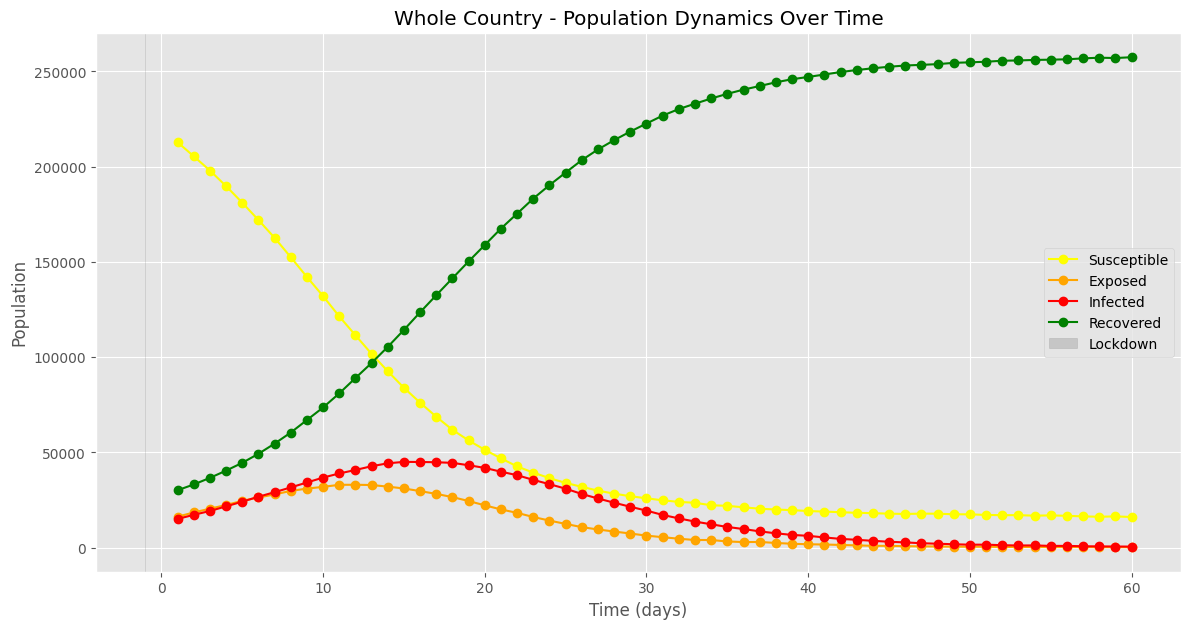

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the style of the graphics
plt.style.use('ggplot')

# Create the figure and axes for the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the lines for the total numbers
ax.plot(country_data_df['Day'], country_data_df['Susceptible'], label='Susceptible', color='yellow', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Exposed'], label='Exposed', color='orange', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Infected'], label='Infected', color='red', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Recovered'], label='Recovered', color='green', marker='o')

# Añadir el título y las etiquetas
ax.set_title('Whole Country - Population Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')

# Resaltar el período de lockdown
lockdown_start = parameters['ls'] - 1  # Ajuste para la indexación basada en cero
lockdown_end = parameters['le'] + lockdown_start
ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Añadir la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


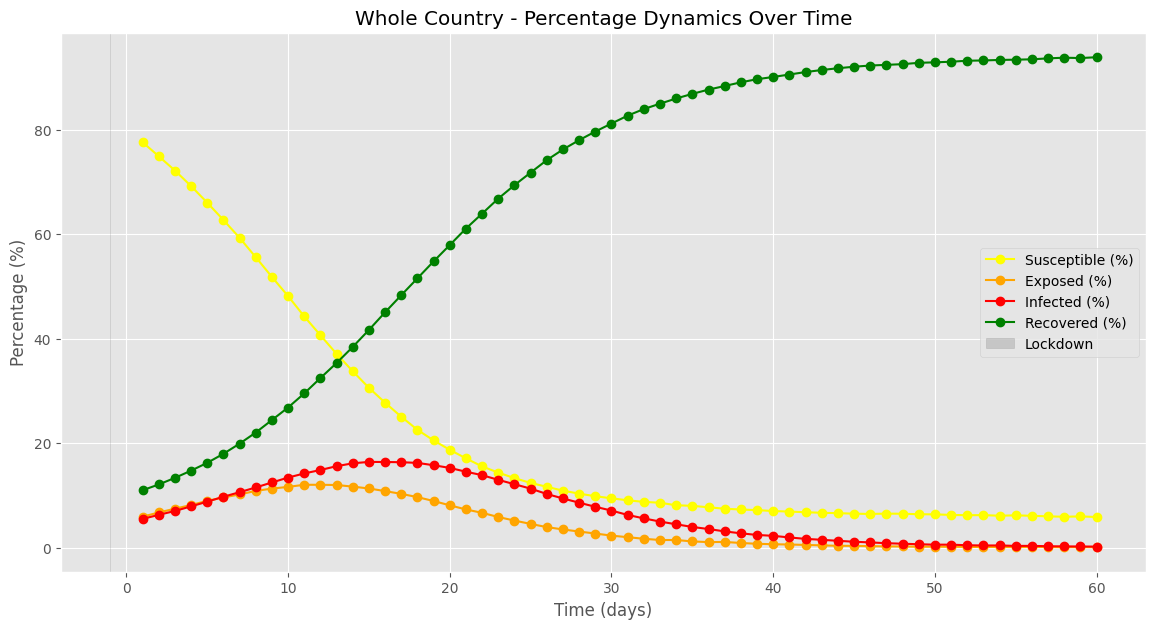

In [38]:
# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# Trazar las líneas para los porcentajes
ax.plot(country_data_df['Day'], country_data_df['Susceptible (%)'], label='Susceptible (%)', color='yellow', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Exposed (%)'], label='Exposed (%)', color='orange', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Infected (%)'], label='Infected (%)', color='red', marker='o')
ax.plot(country_data_df['Day'], country_data_df['Recovered (%)'], label='Recovered (%)', color='green', marker='o')

# Añadir el título y las etiquetas
ax.set_title('Whole Country - Percentage Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Percentage (%)')

# Resaltar el período de lockdown
lockdown_start = parameters['ls'] - 1  # Ajuste para la indexación basada en cero
lockdown_end = lockdown_start + parameters['le']
ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Añadir la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

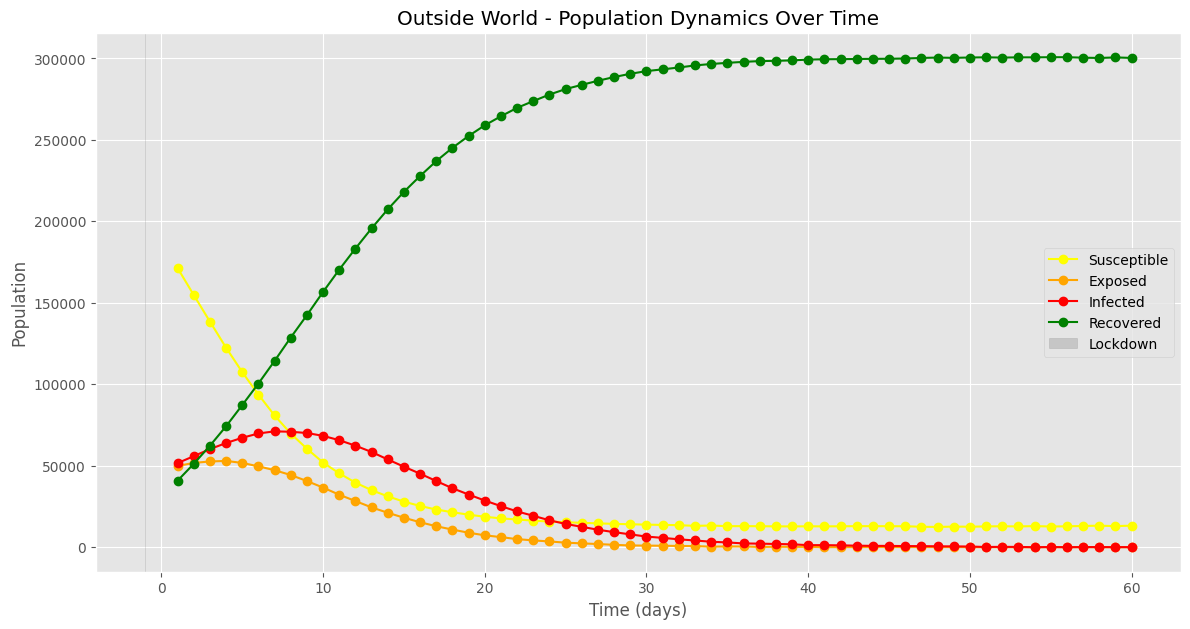

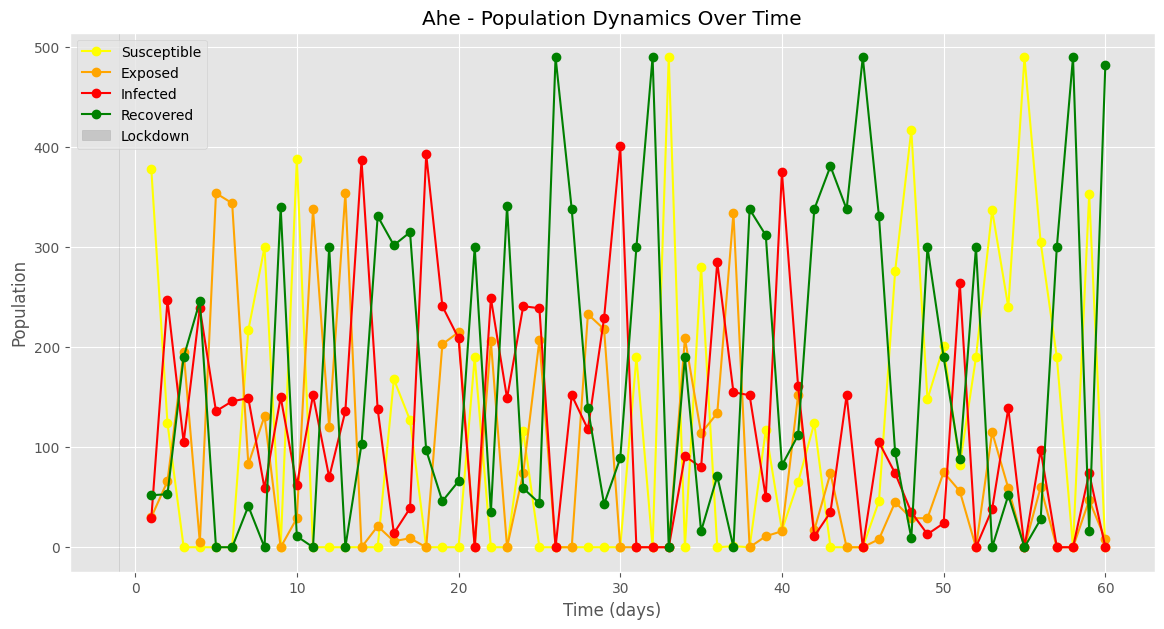

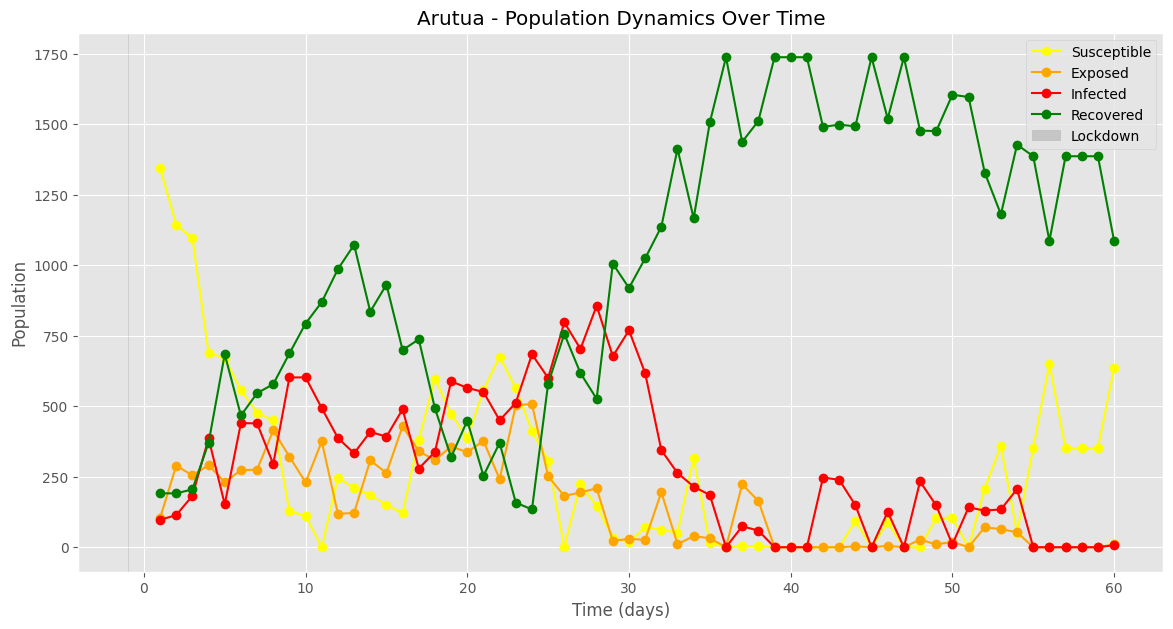

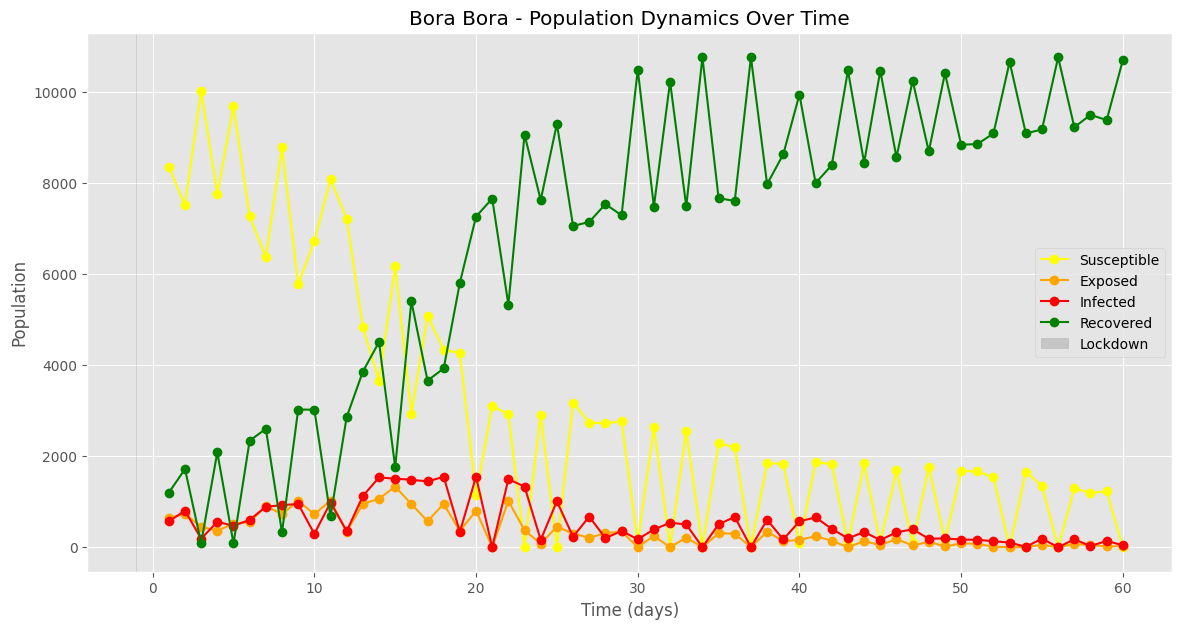

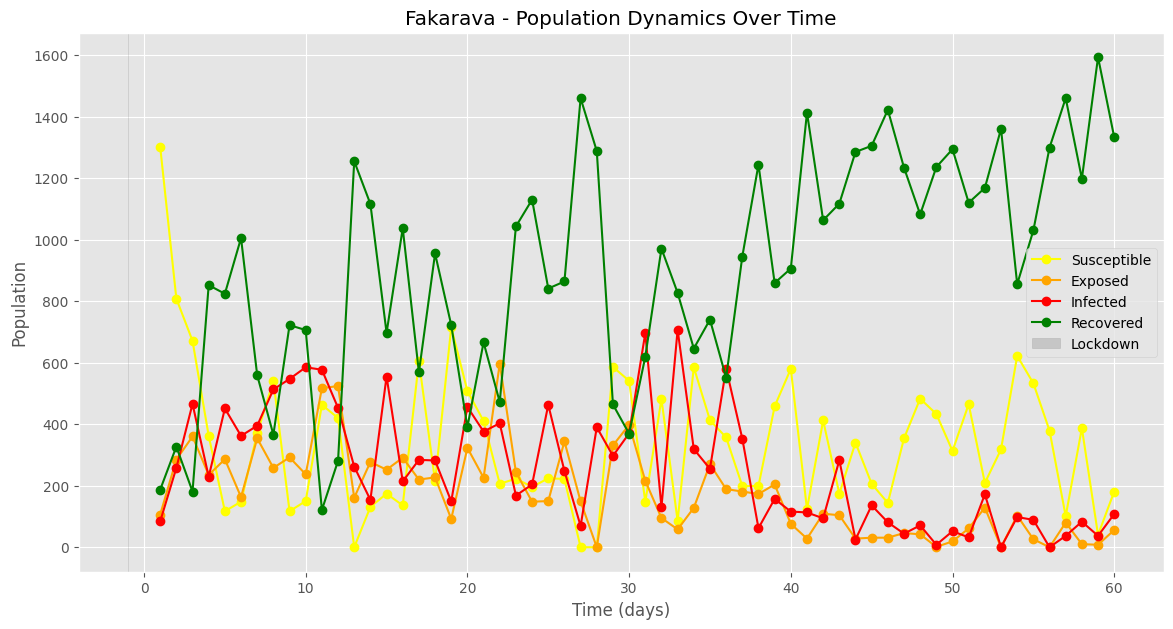

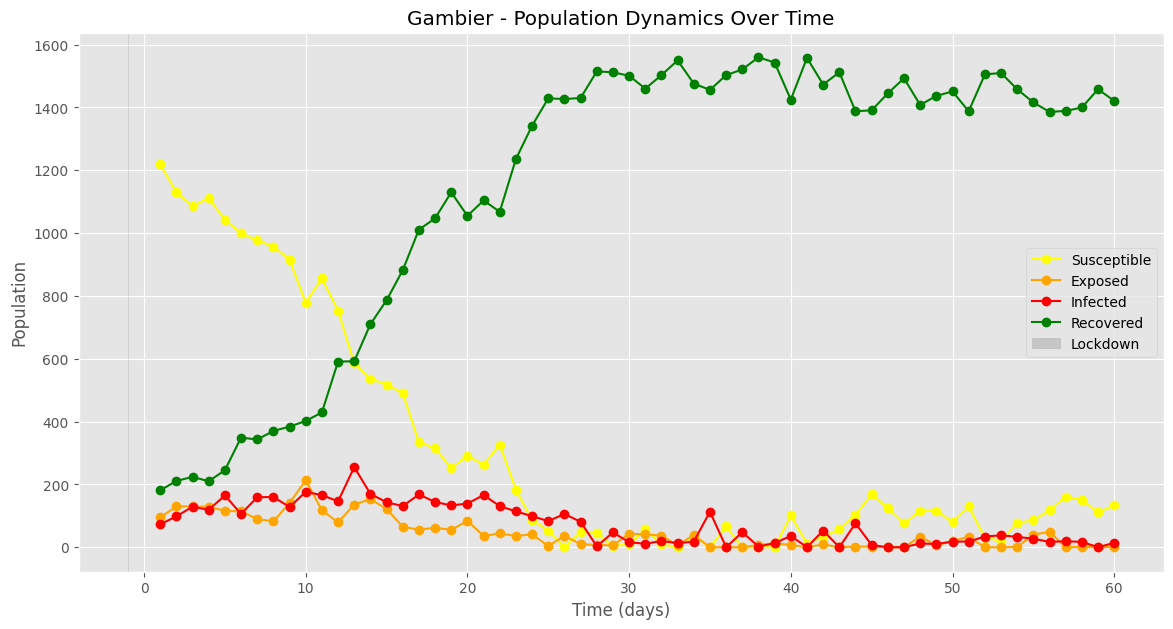

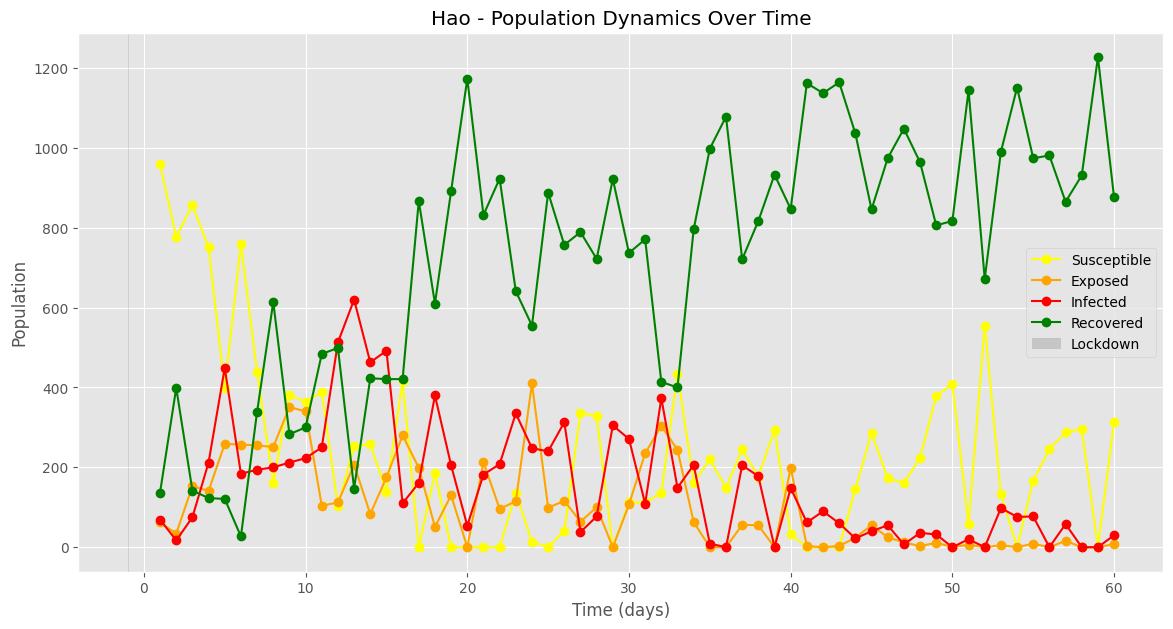

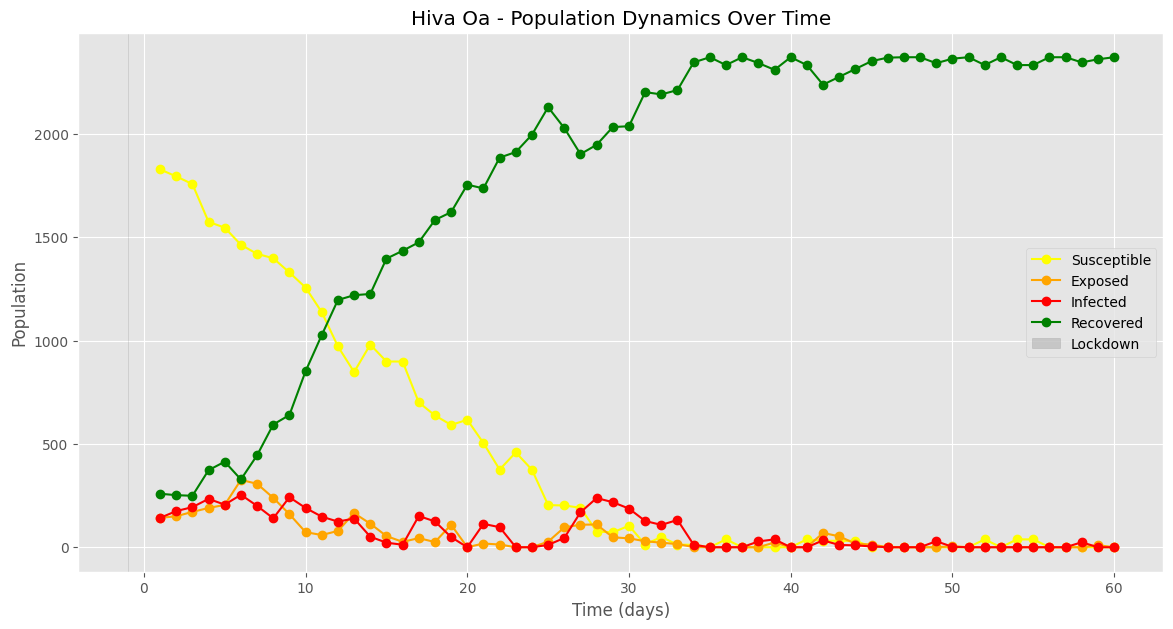

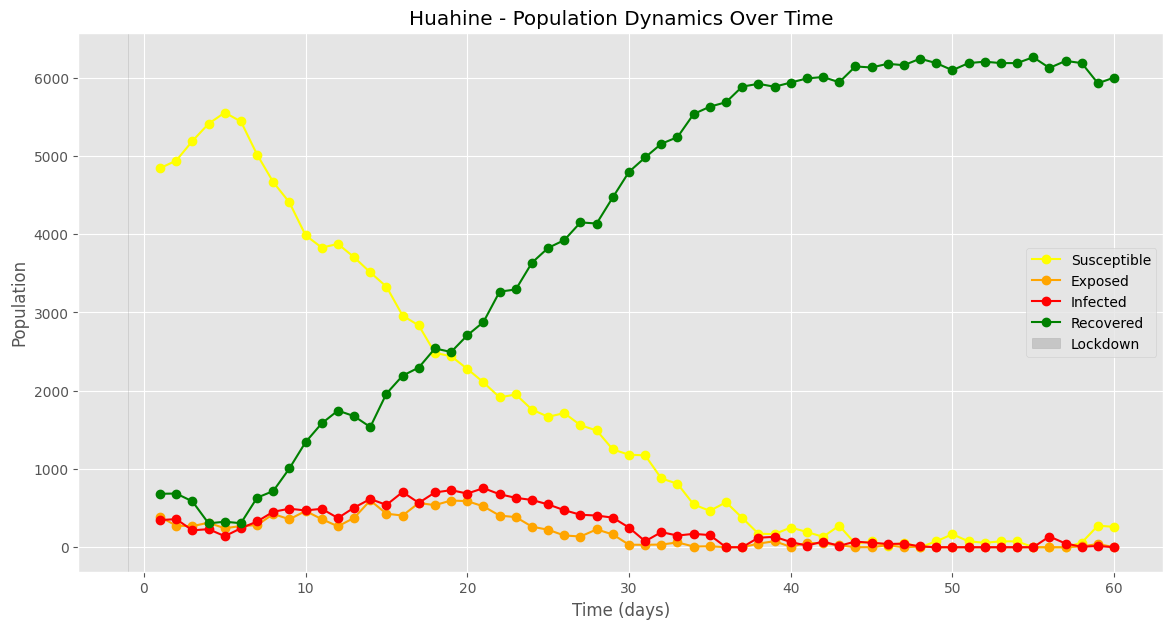

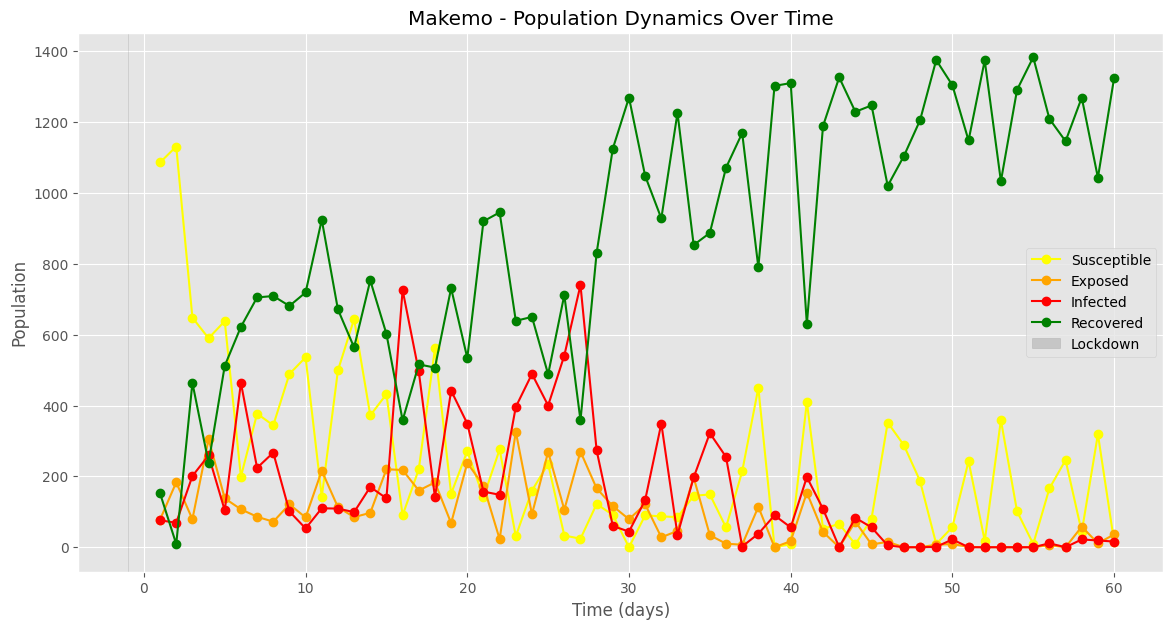

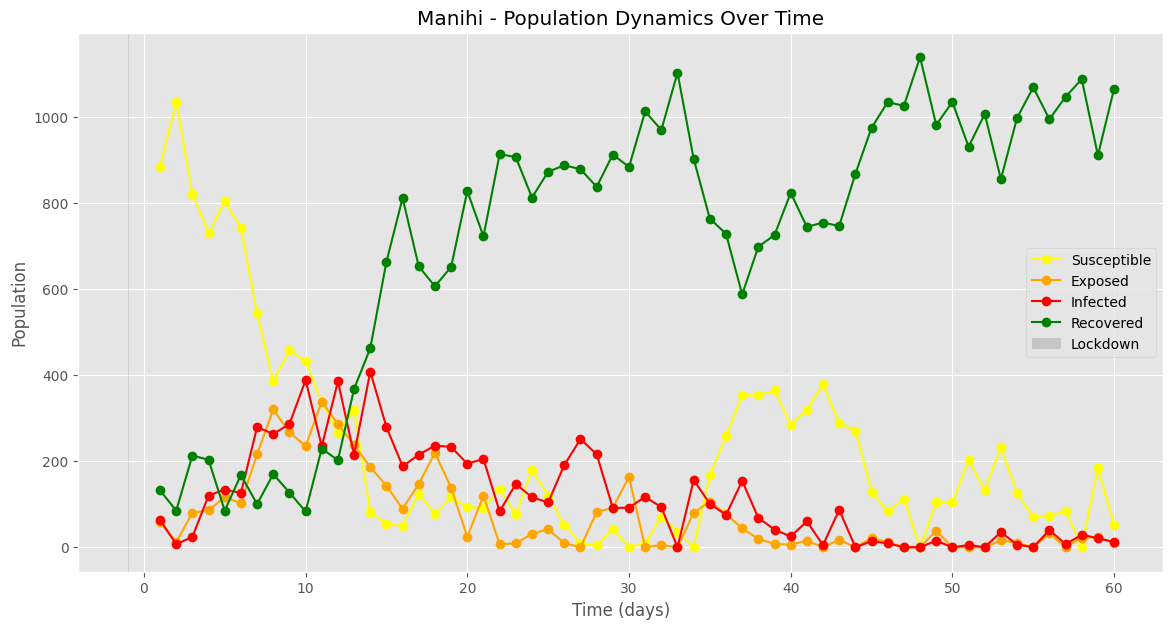

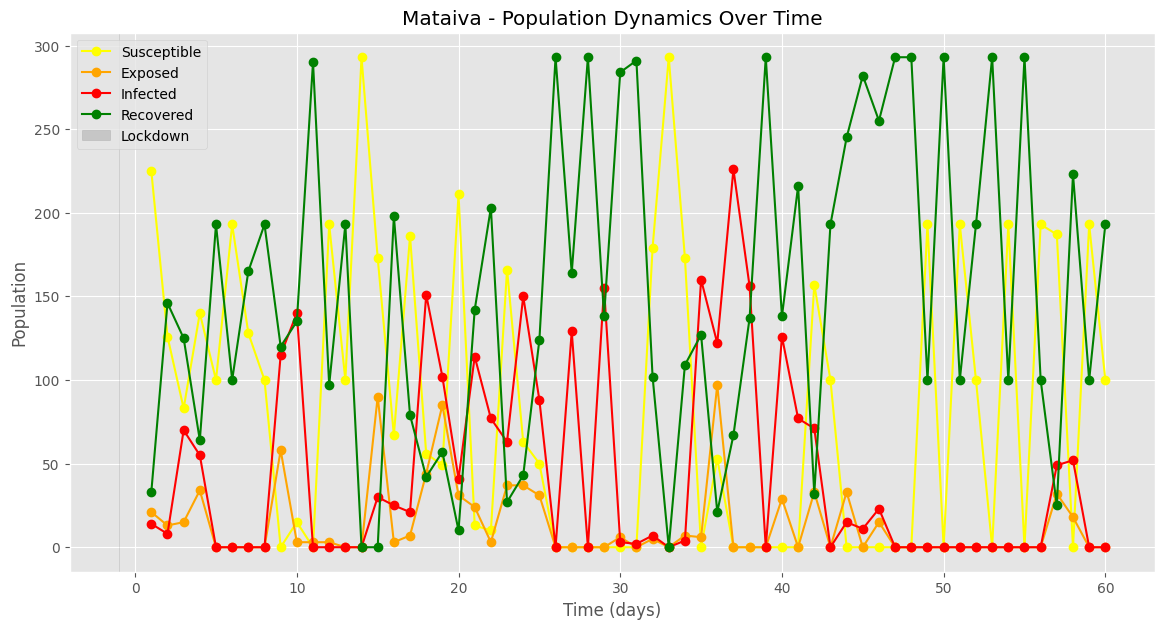

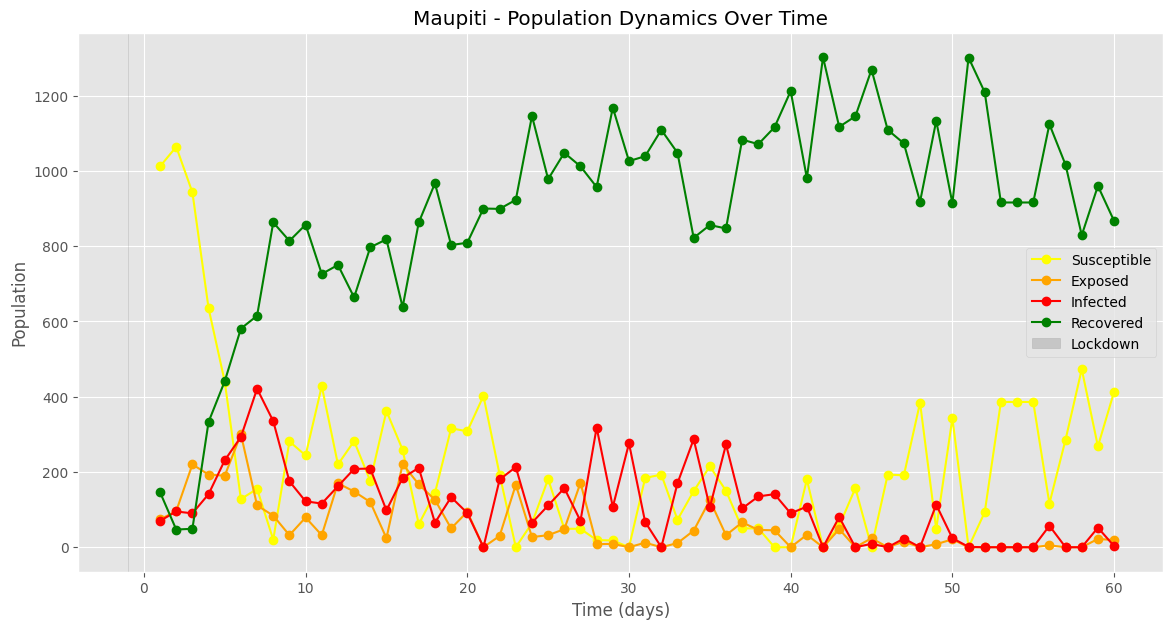

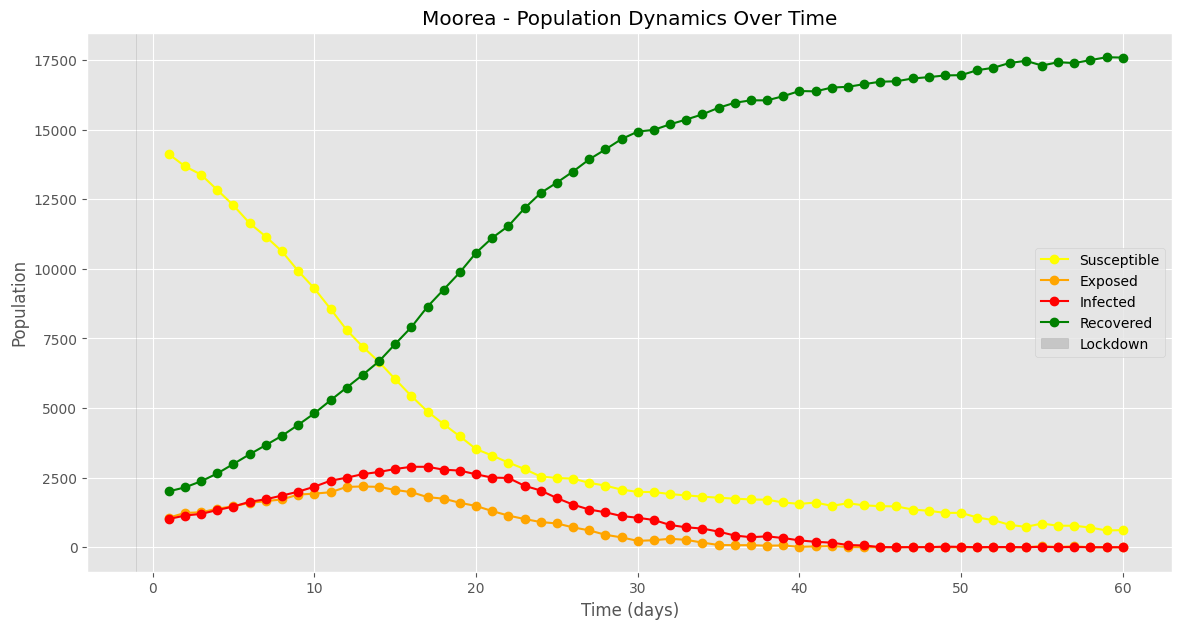

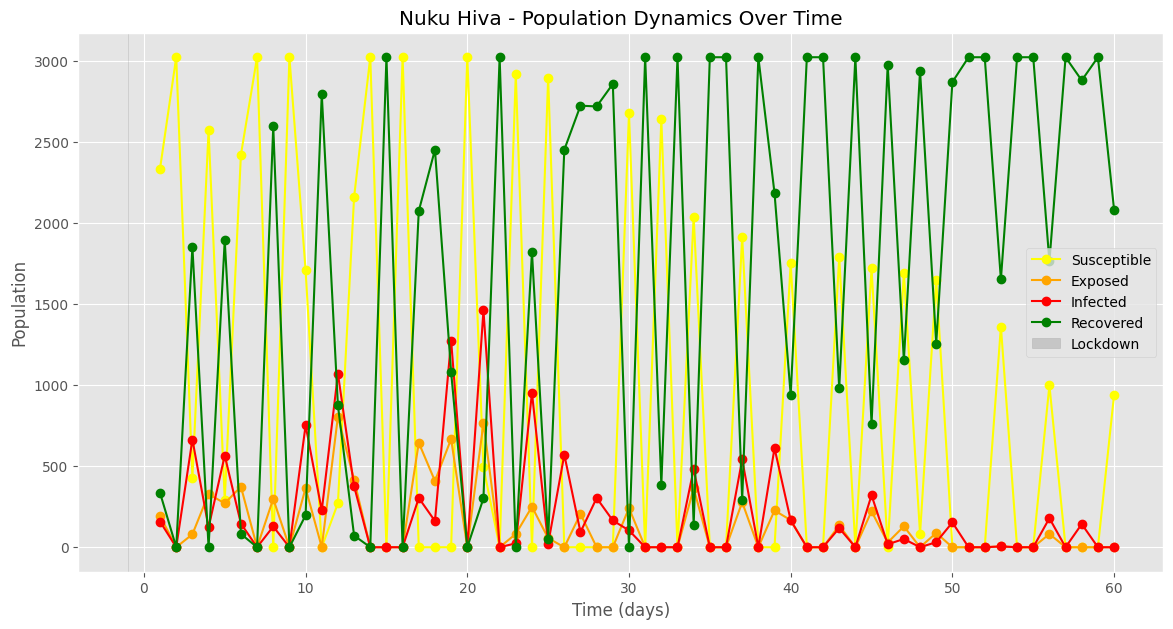

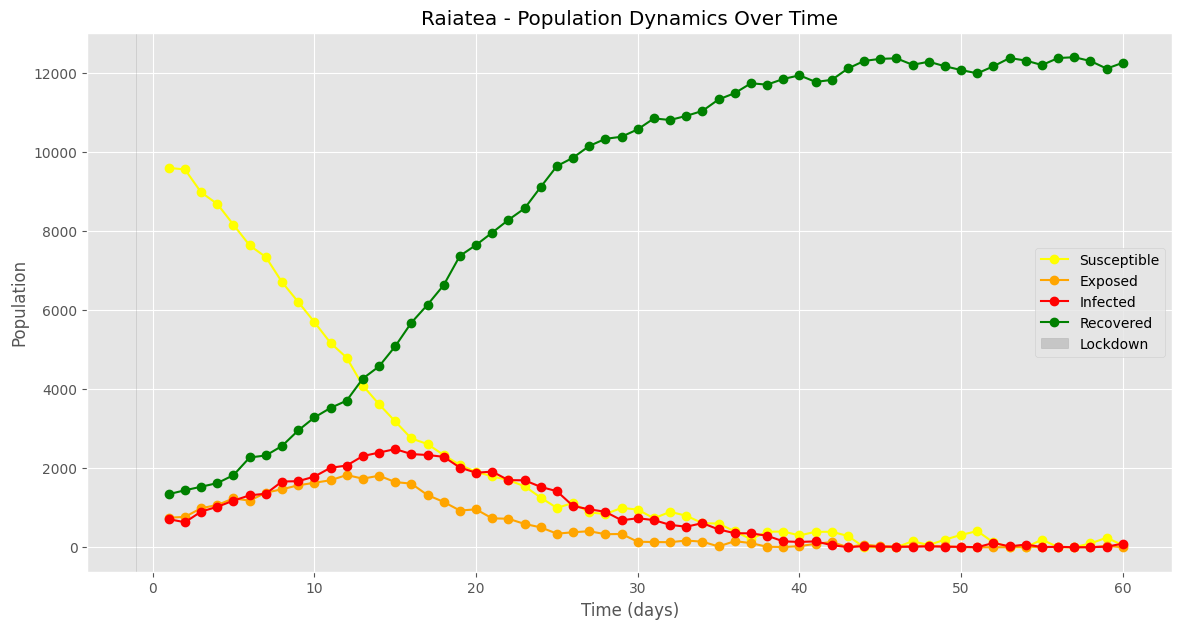

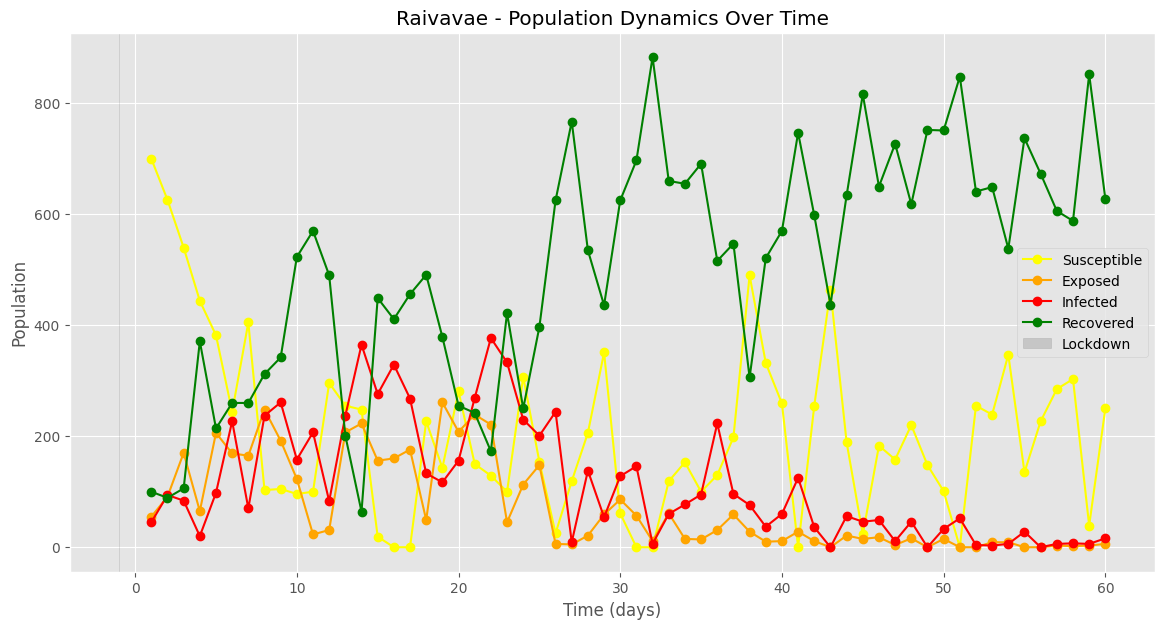

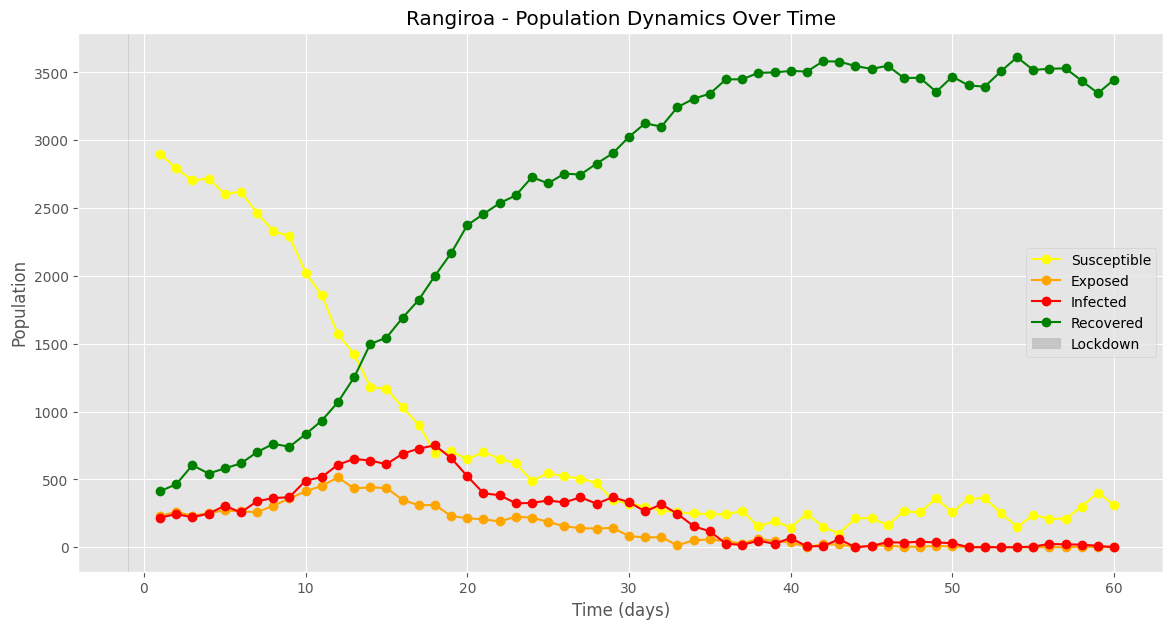

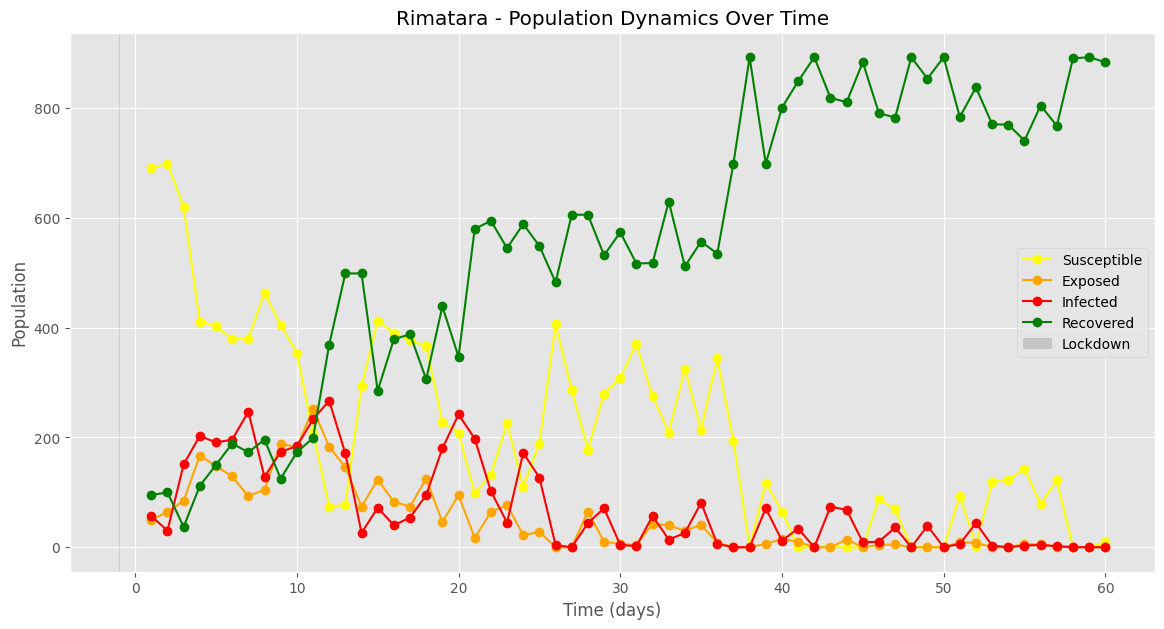

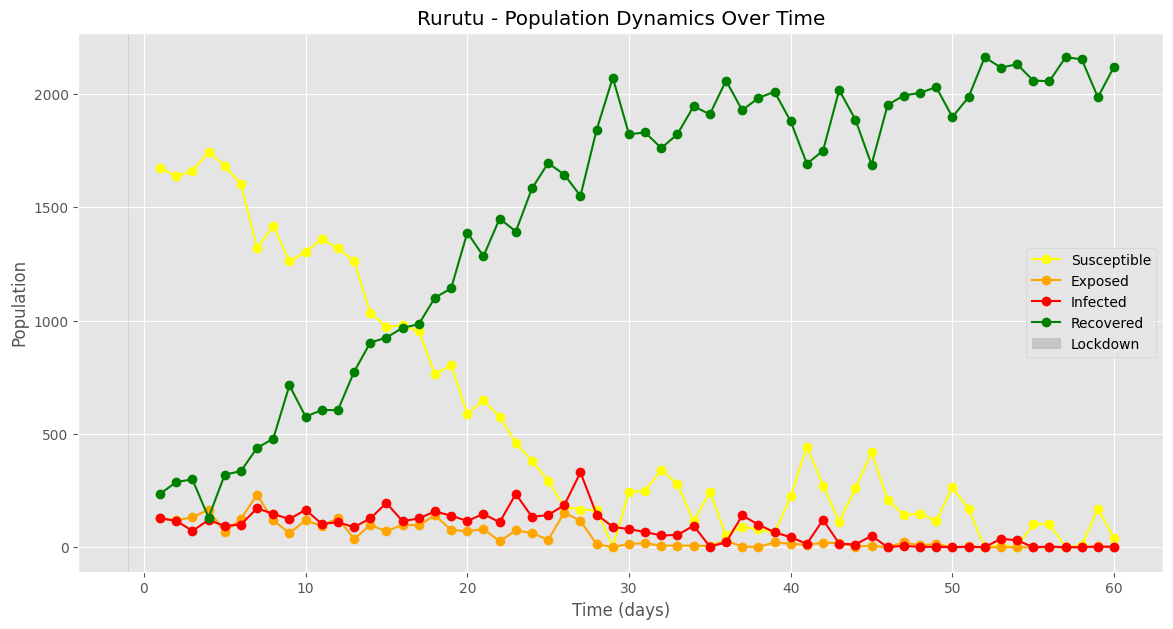

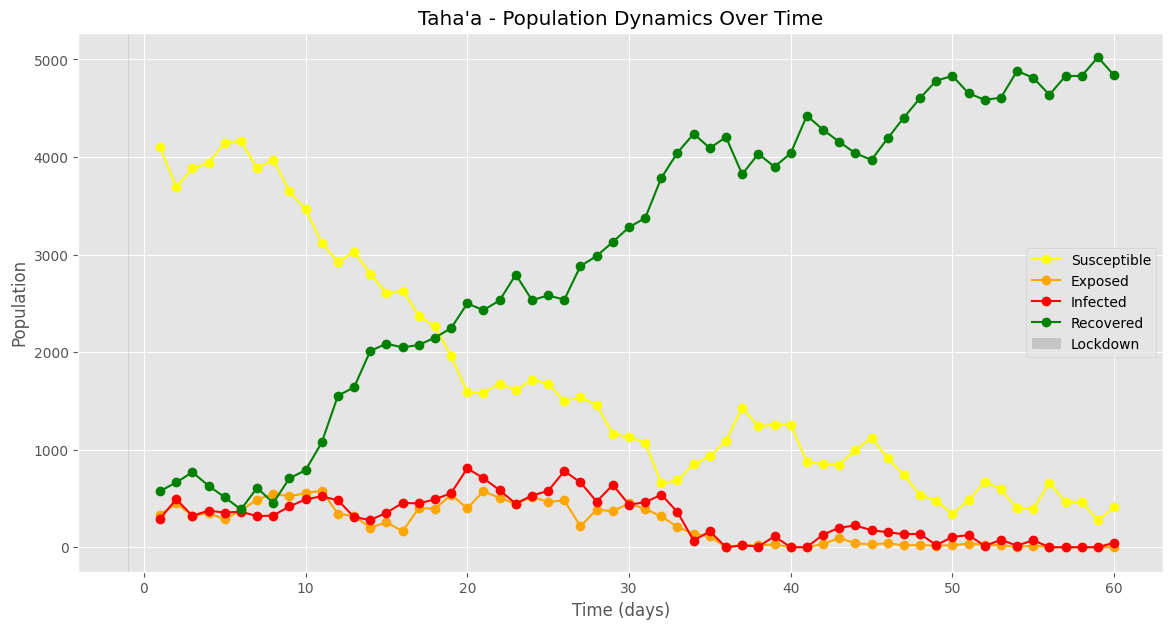

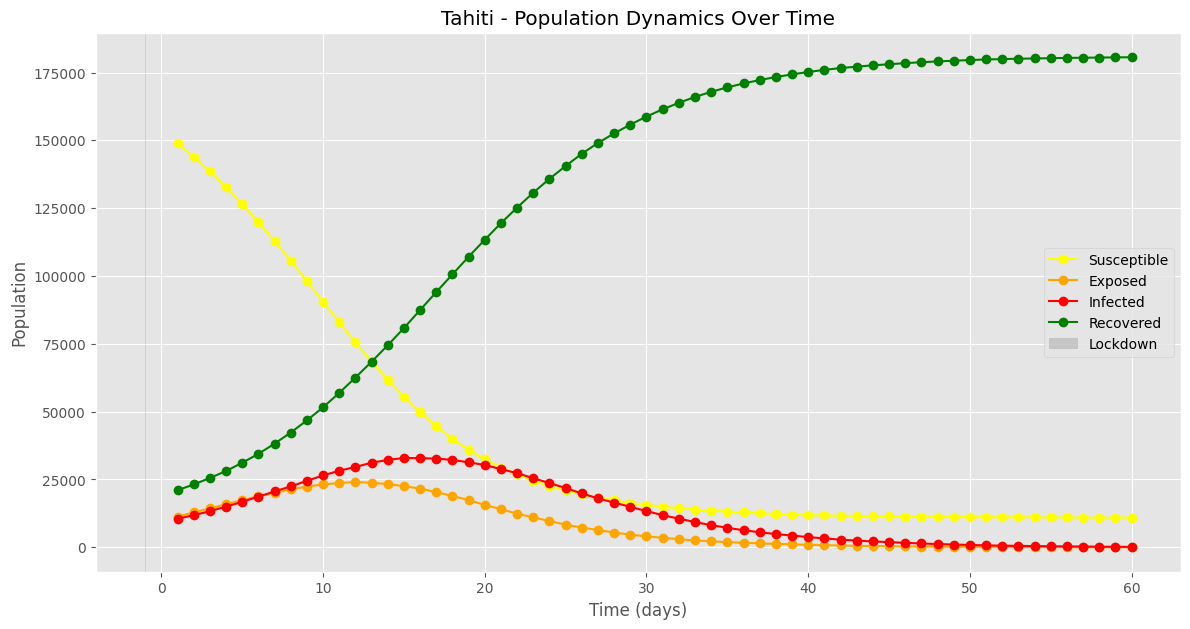

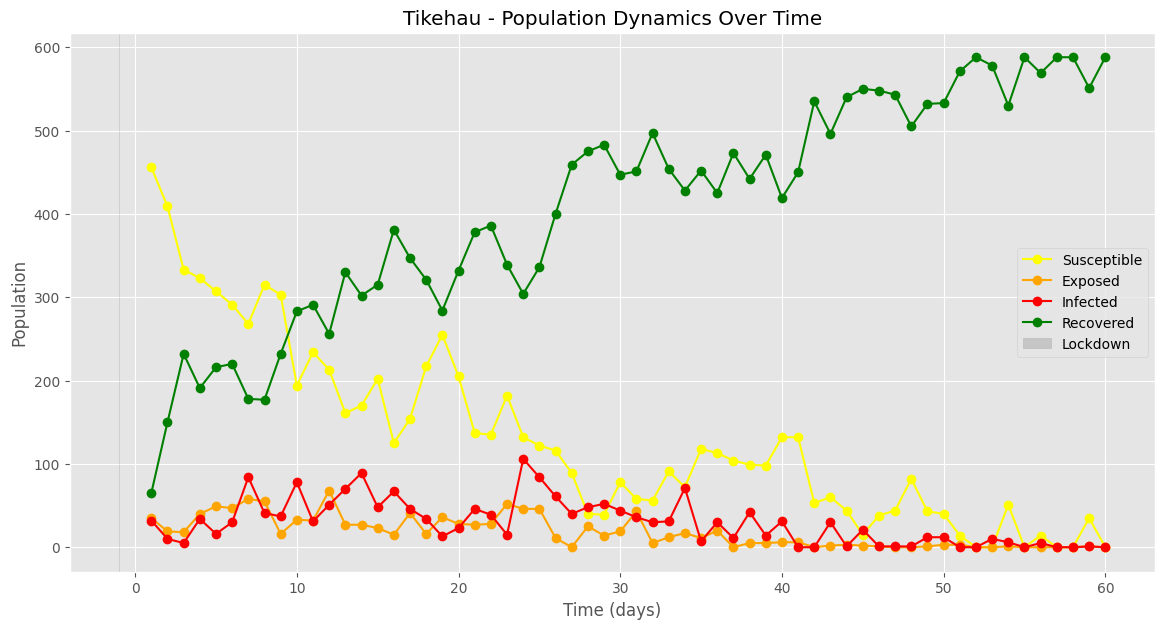

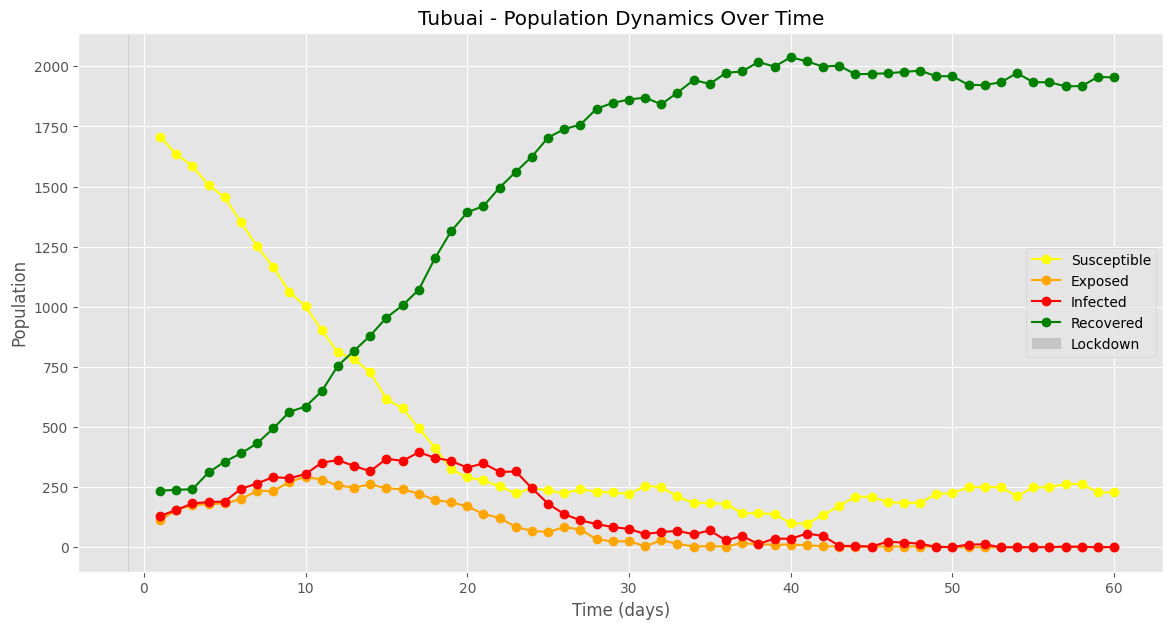

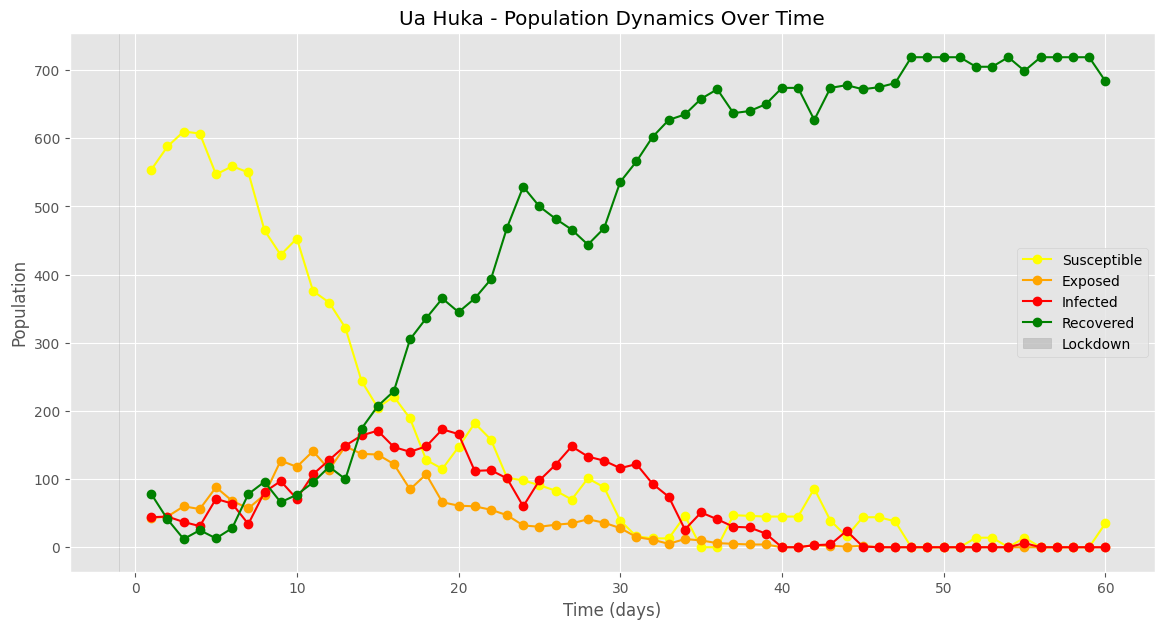

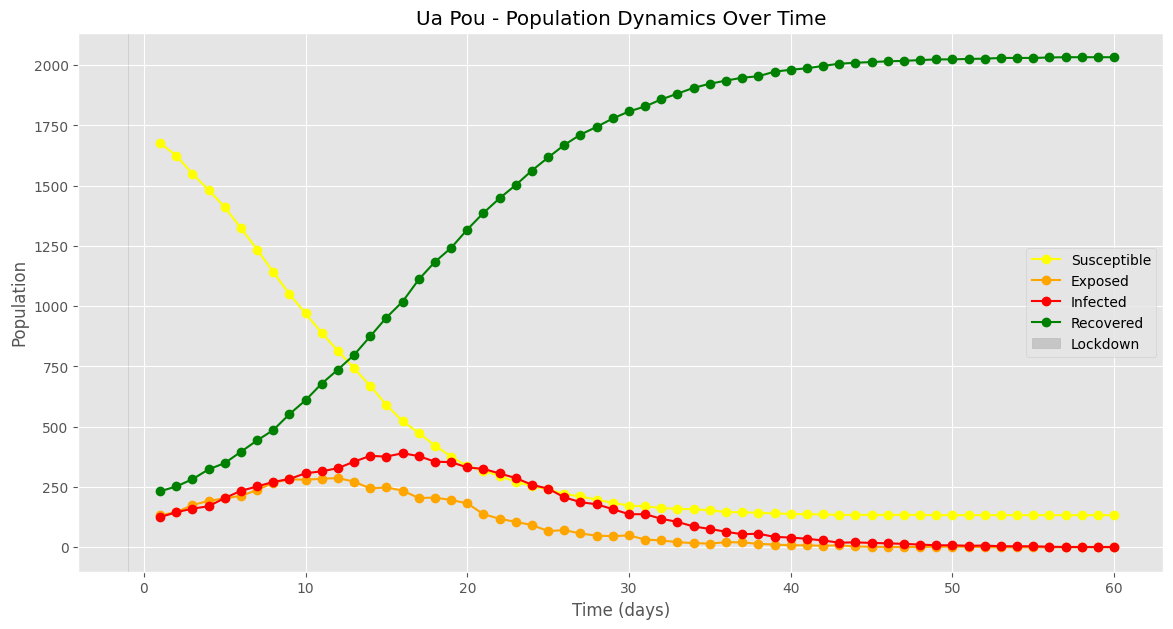

In [39]:
# Configuración del estilo de los gráficos
plt.style.use('ggplot')

# Etiquetas para las categorías de la población
compartment_labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Parámetros de lockdown para marcar en el gráfico
lockdown_start = parameters['ls'] - 1  # Ajuste para indexación basada en cero
lockdown_end = parameters['le'] + lockdown_start

# Iterar sobre cada comunidad para crear un gráfico
for i, community_name in enumerate(communities_ordered):
    # Saltar "Outside World"
    #if community_name == "Outside World":
        #continue
    
    # Crear la figura para cada comunidad
    plt.figure(figsize=(14, 7))

    # Extraer los datos de cada compartimento para la comunidad actual
    for j, (label, color) in enumerate(zip(compartment_labels, compartment_colors)):
        compartment_history = [day_array[i, j] for day_array in history]  
        plt.plot(days, compartment_history, label=label, color=color, marker='o')
    
    # Ajustar los ejes y añadir título y etiquetas
    plt.title(f"{community_name} - Population Dynamics Over Time")
    plt.xlabel("Time (days)")
    plt.ylabel("Population")
    
    # Resaltar el período de lockdown
    plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

    # Añadir leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()


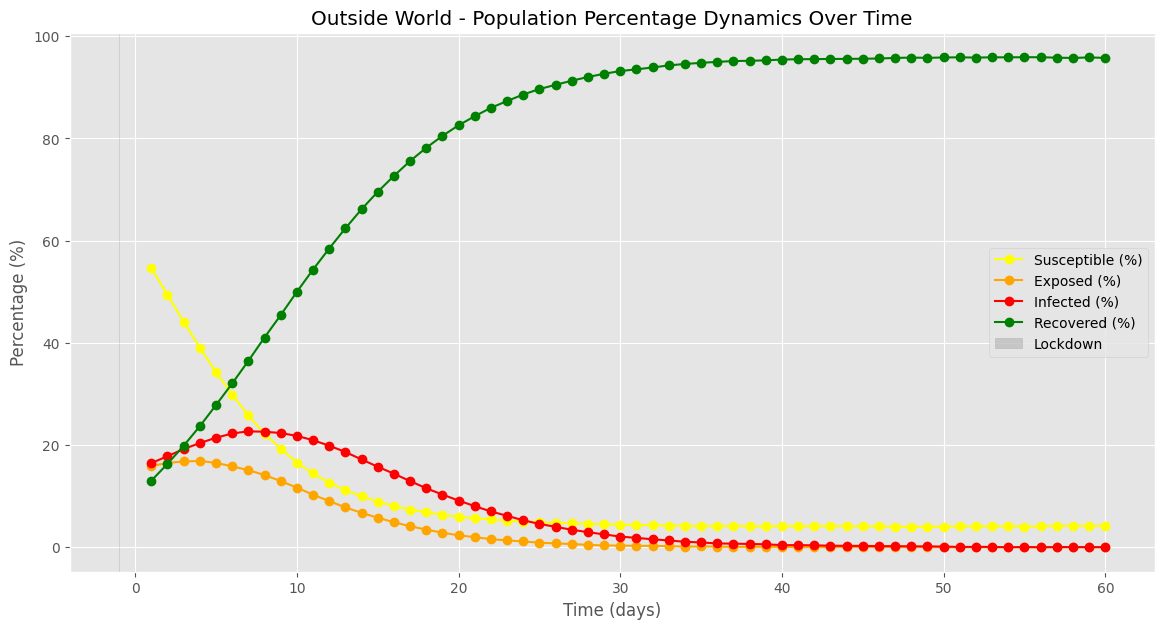

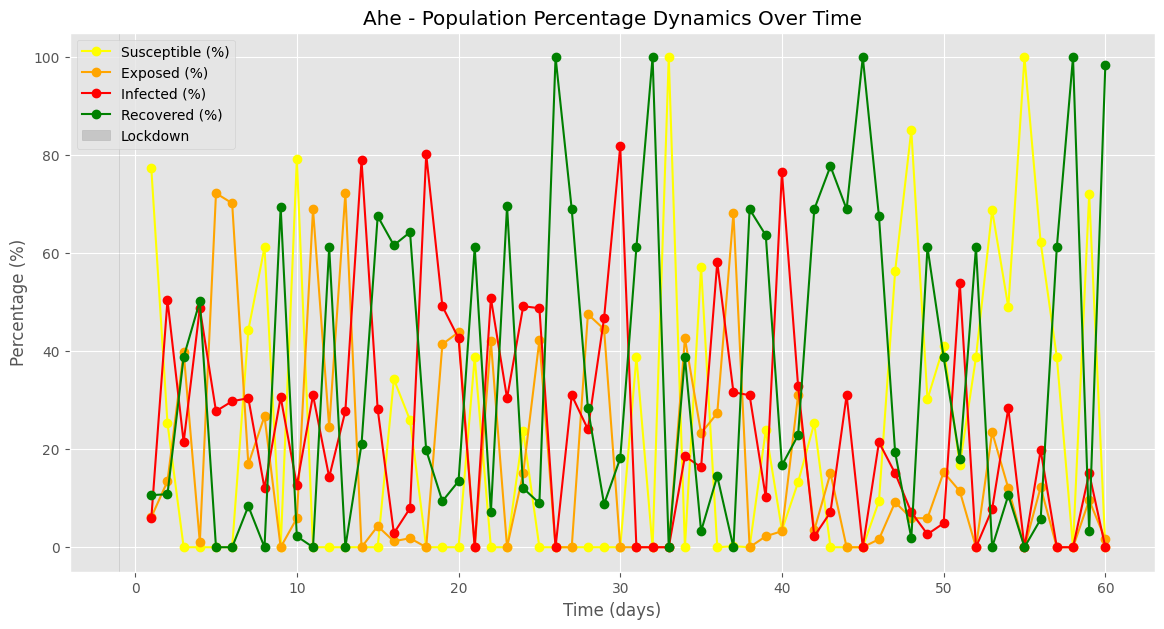

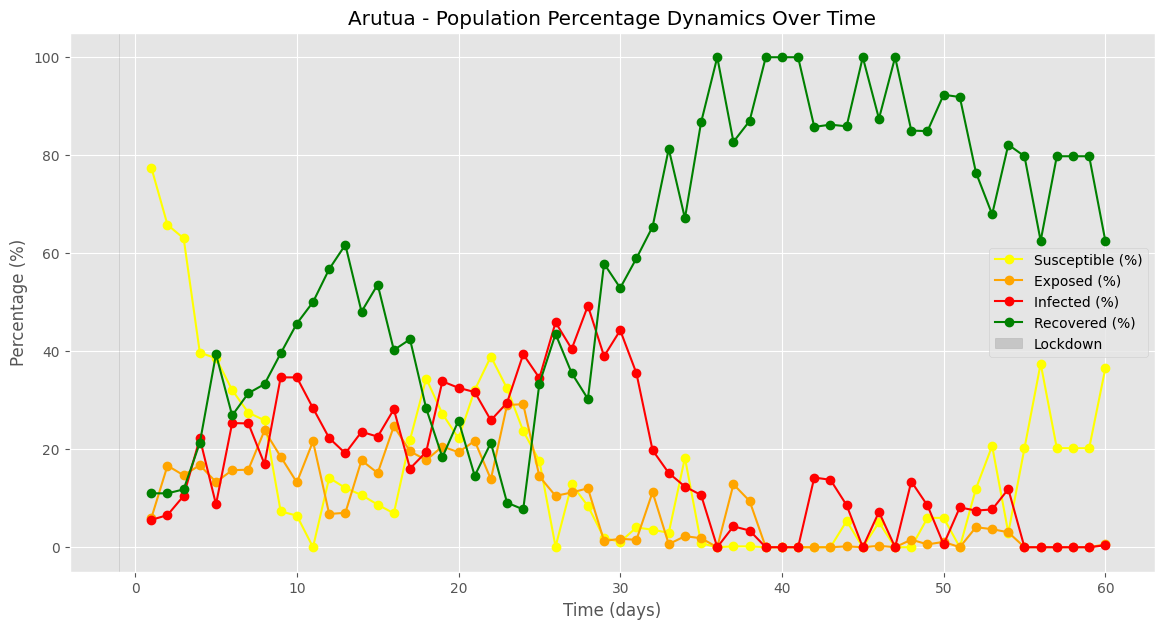

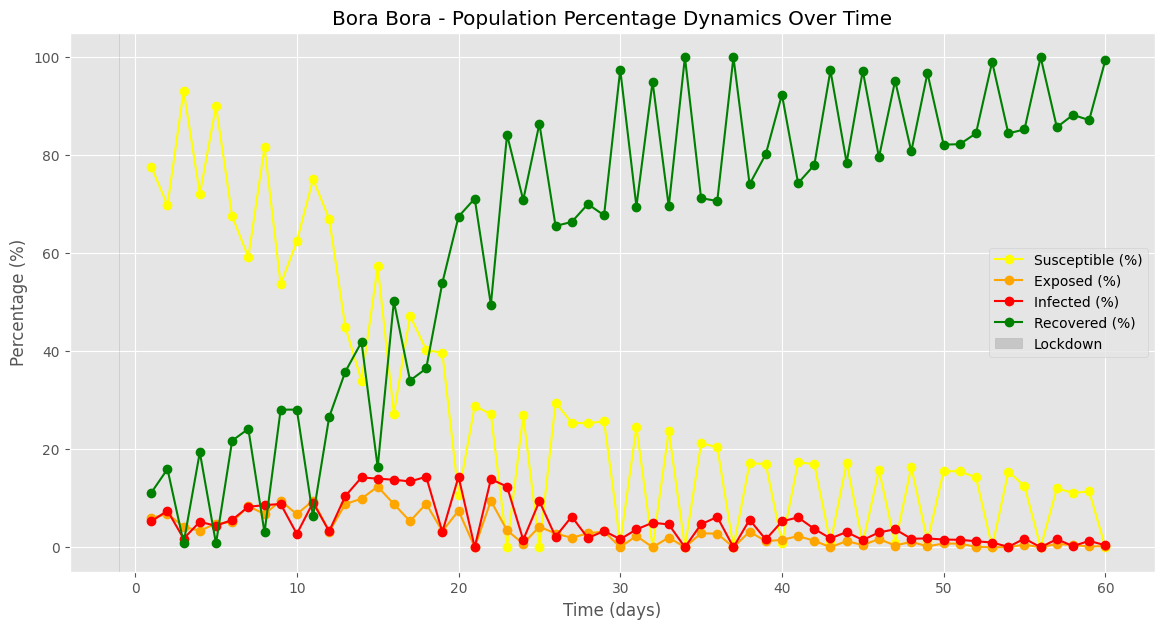

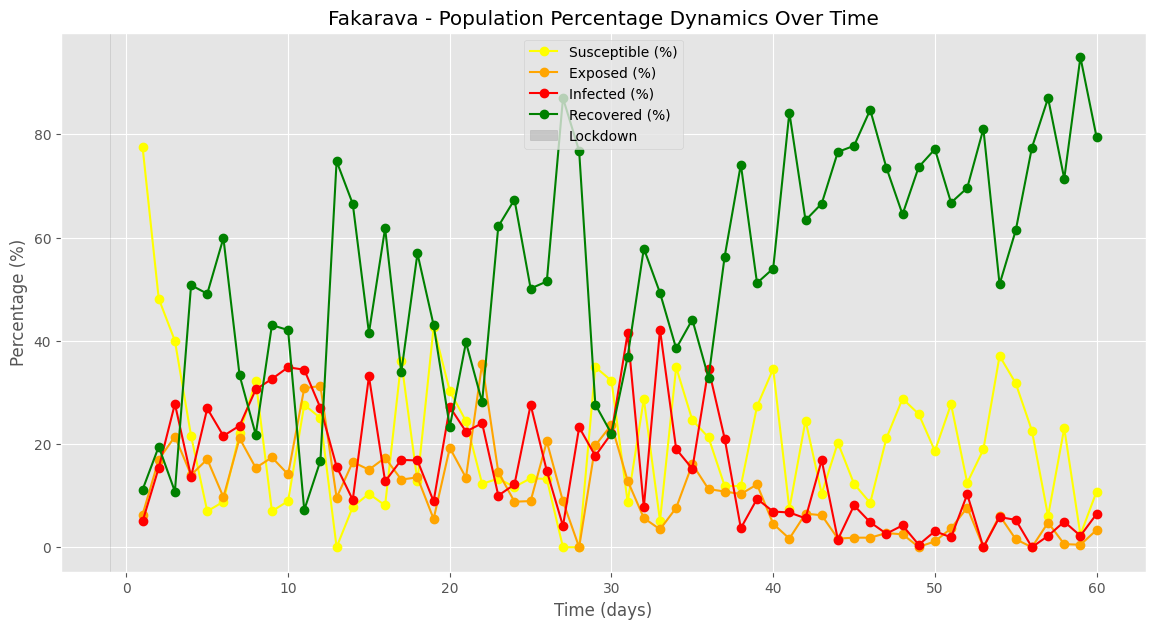

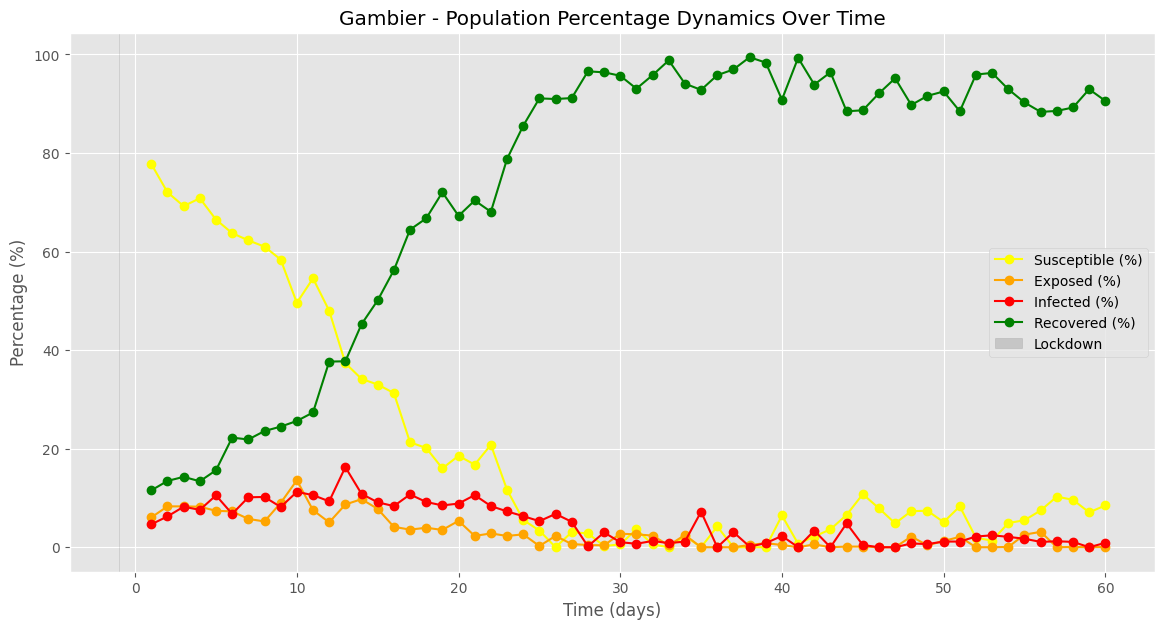

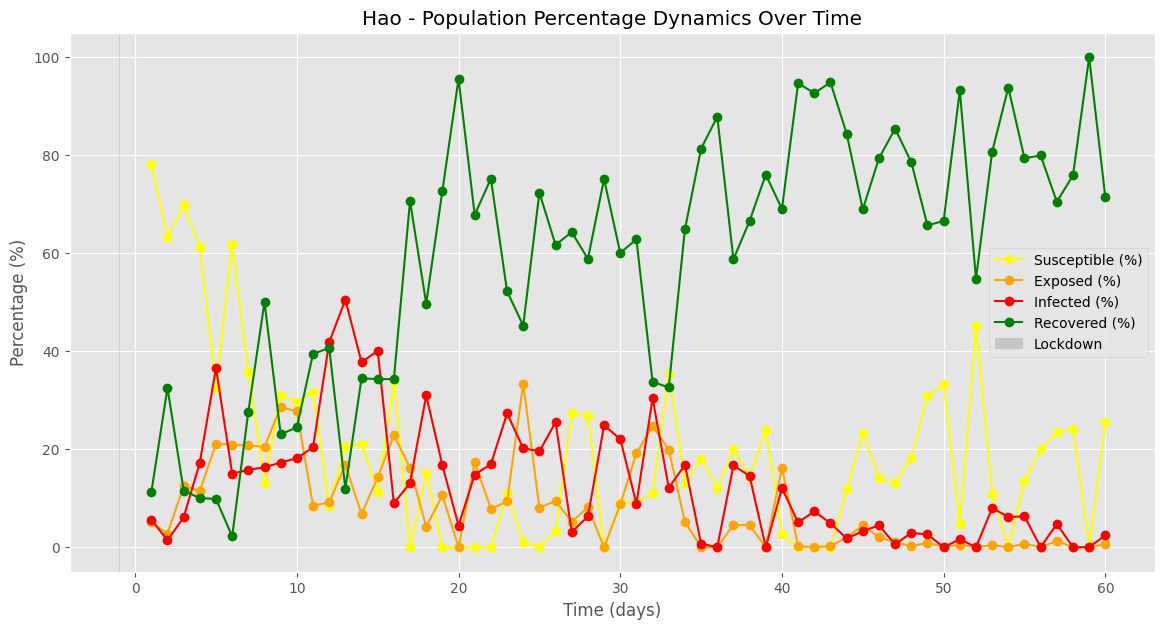

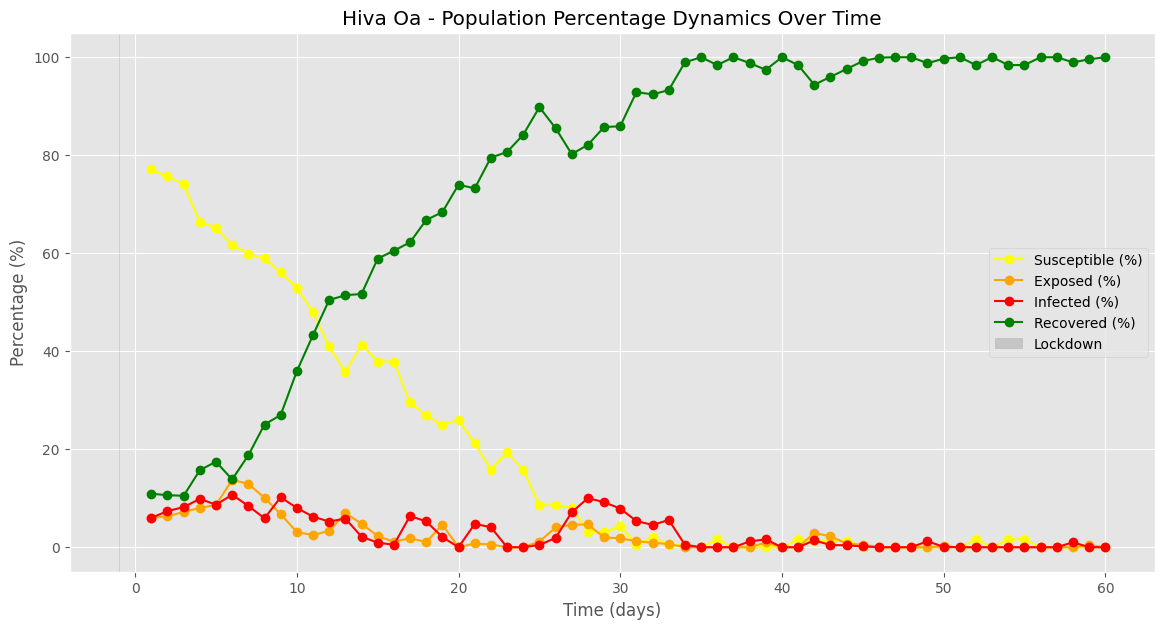

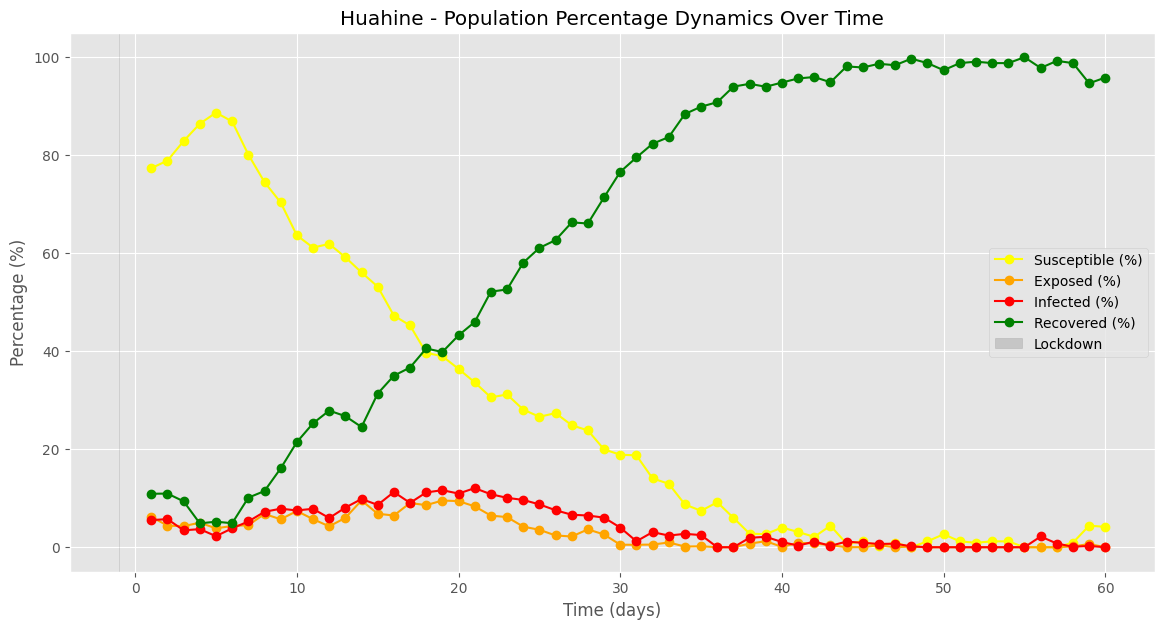

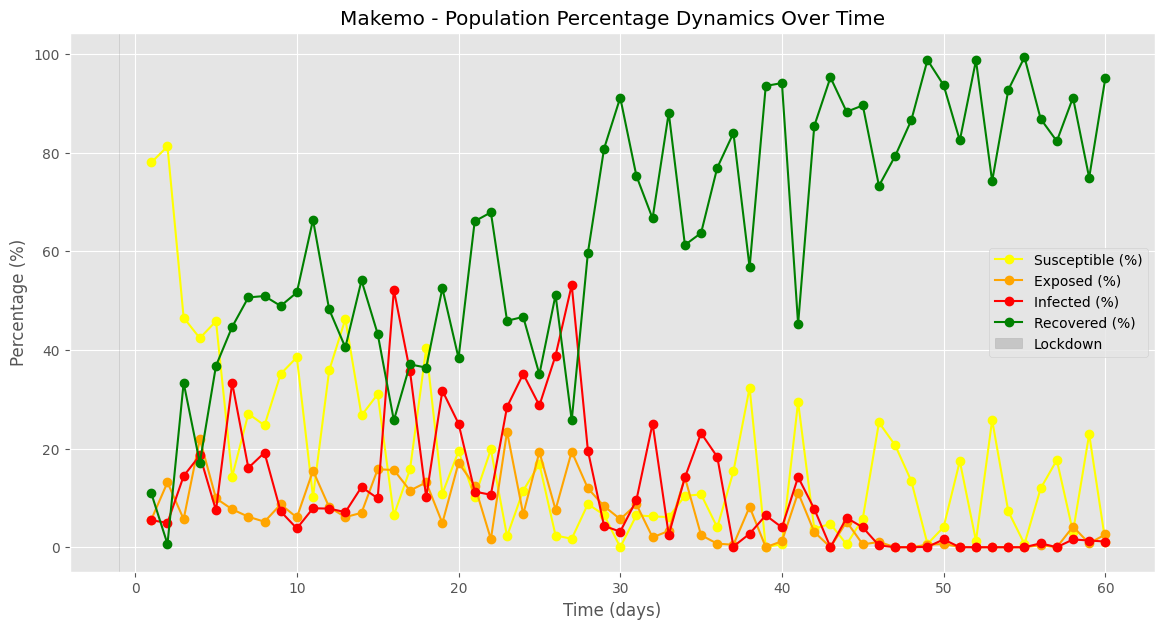

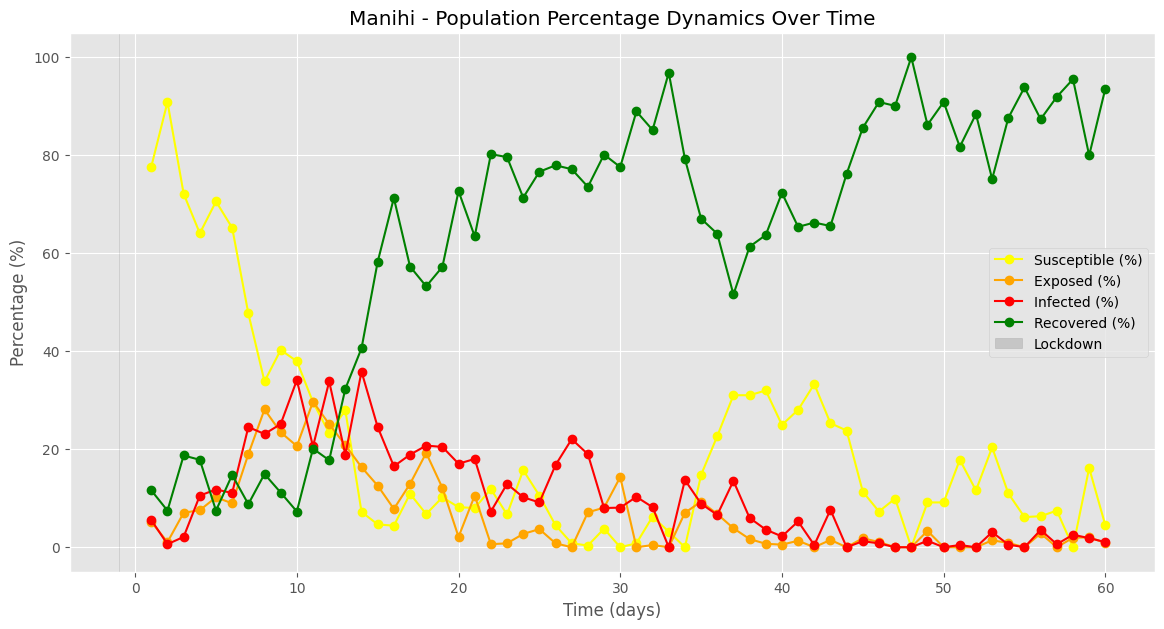

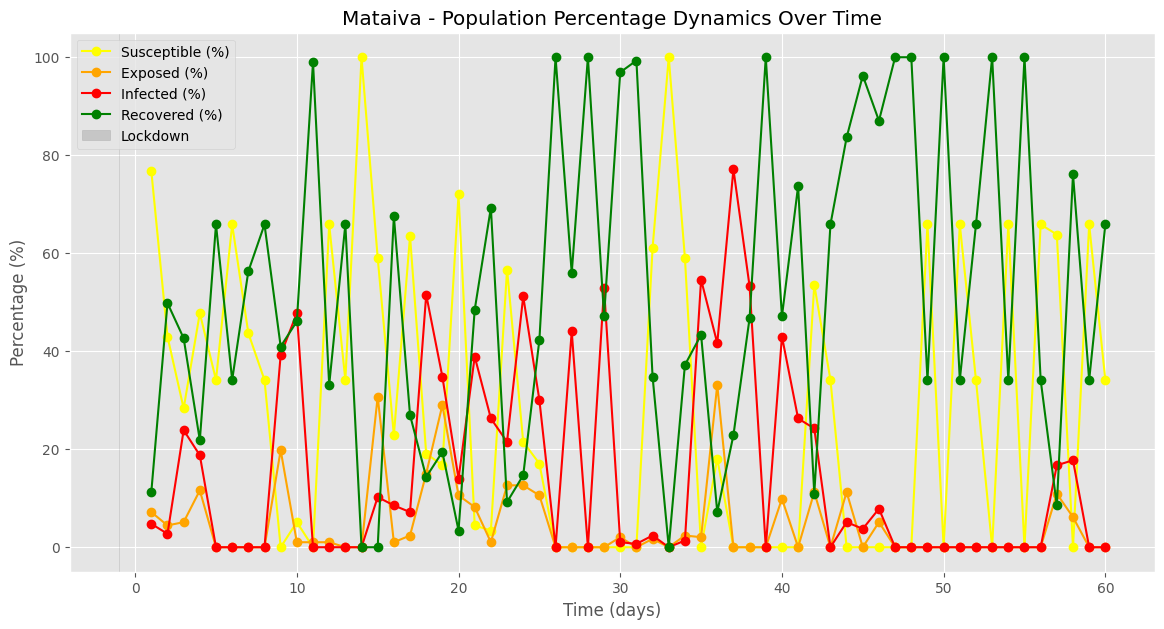

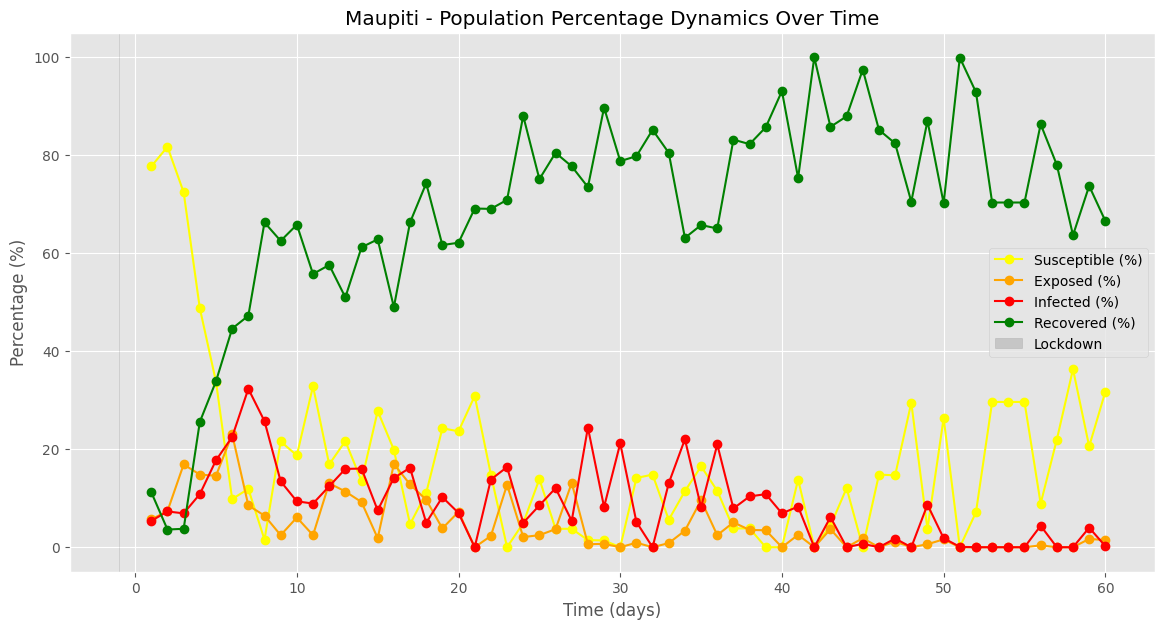

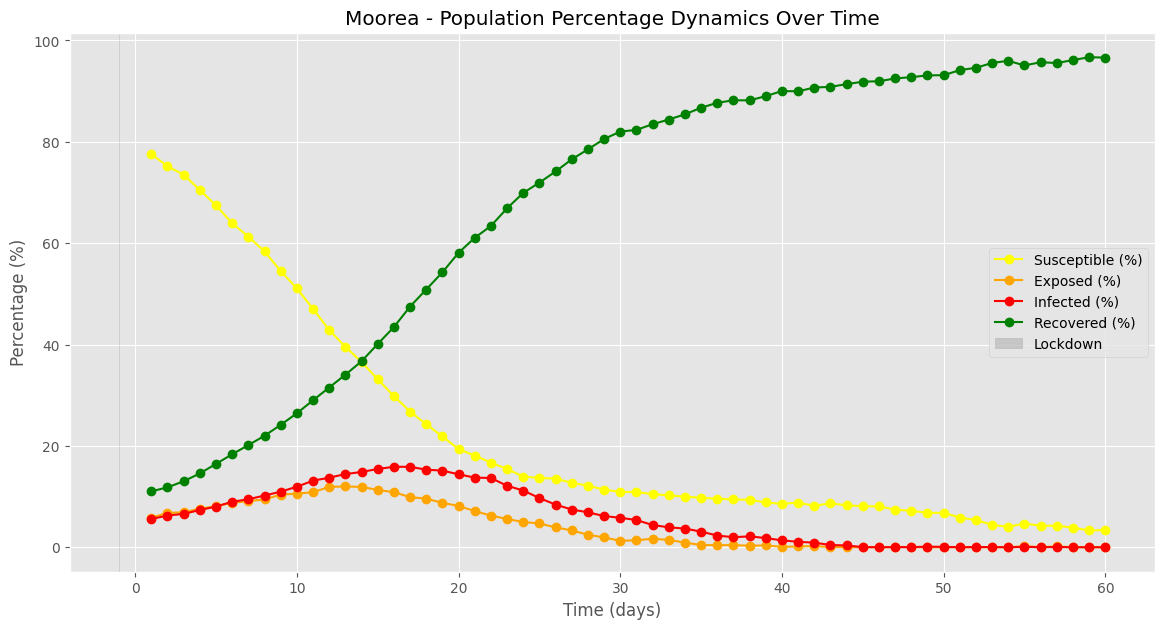

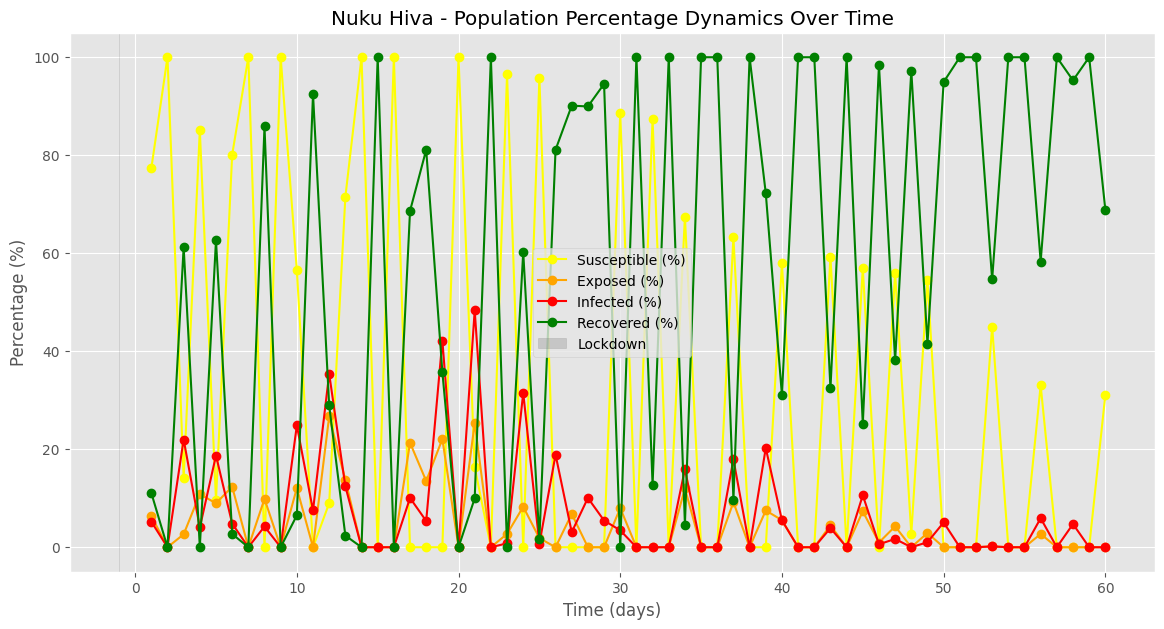

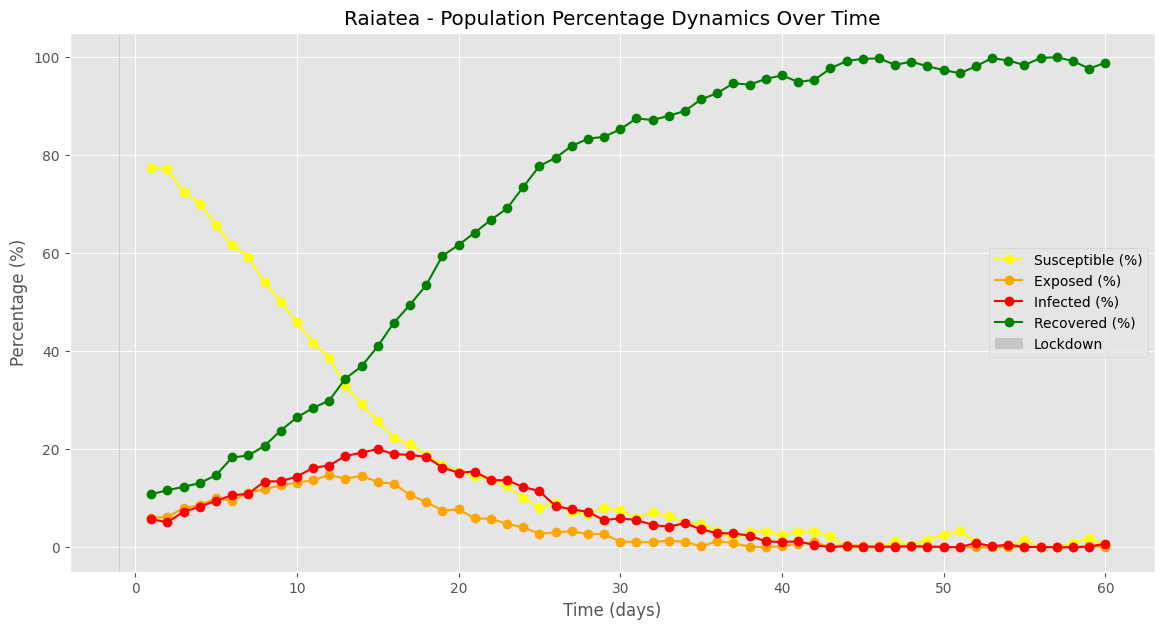

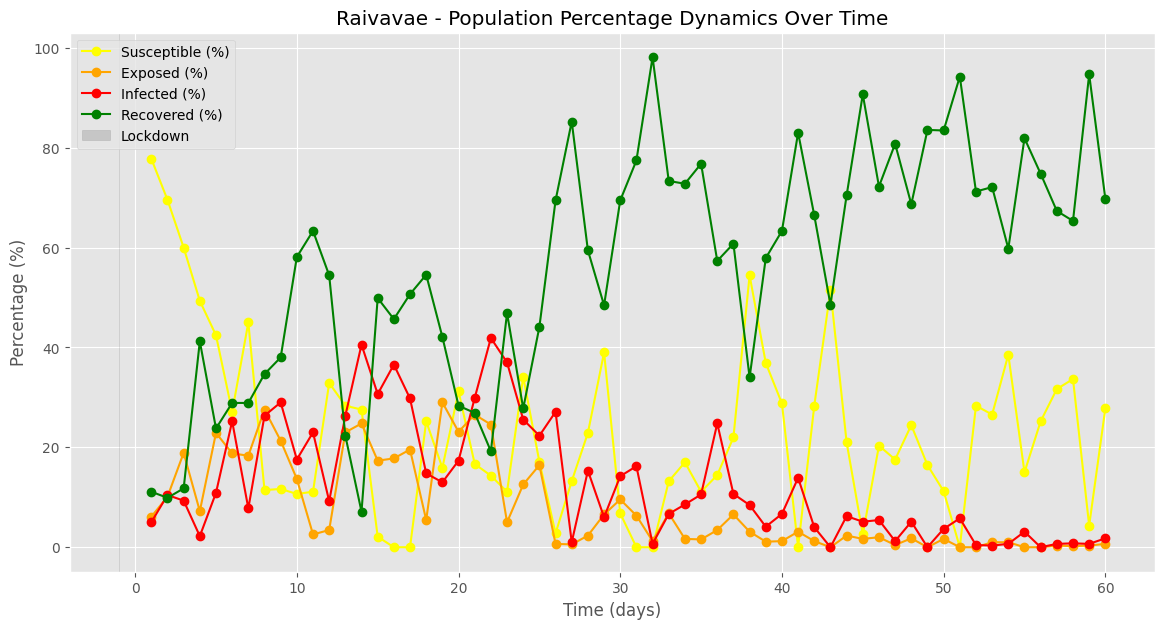

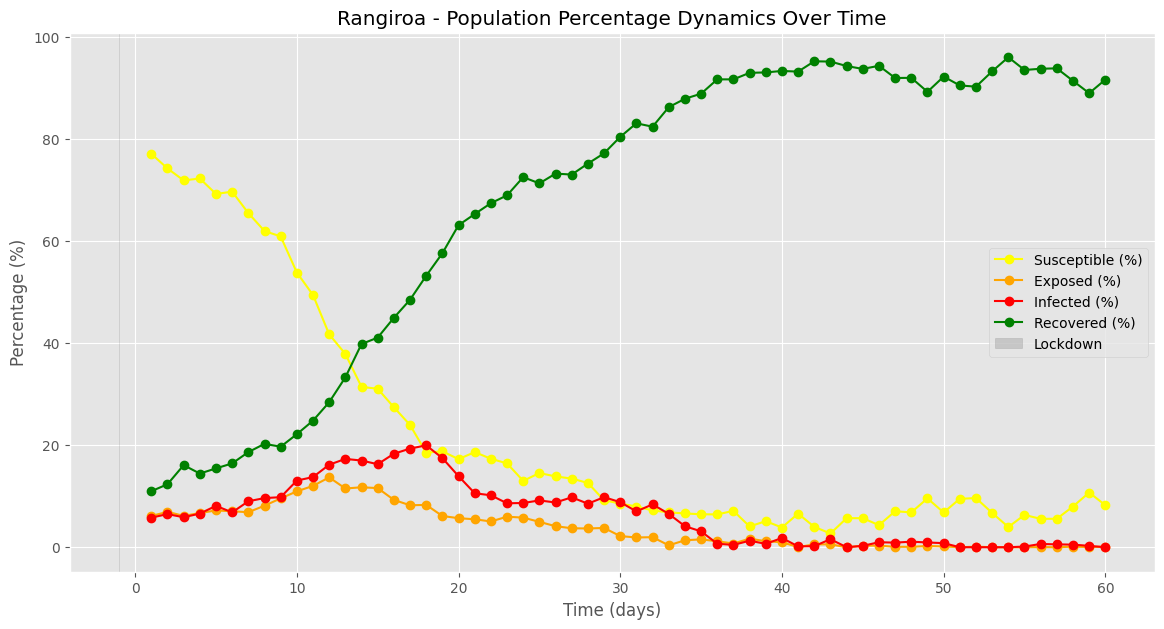

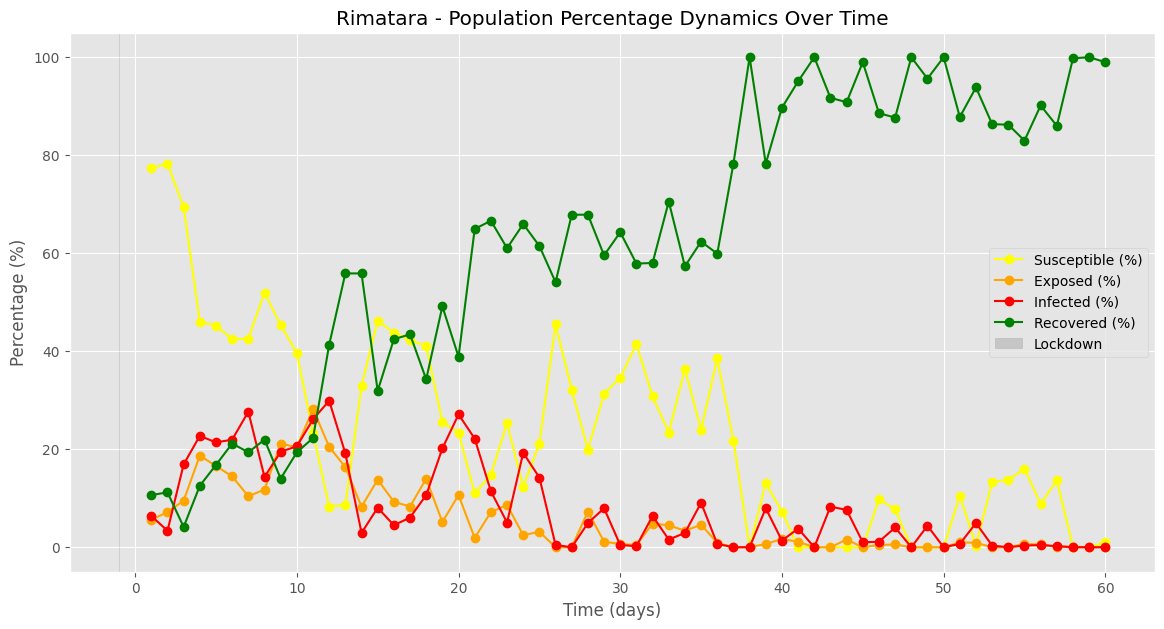

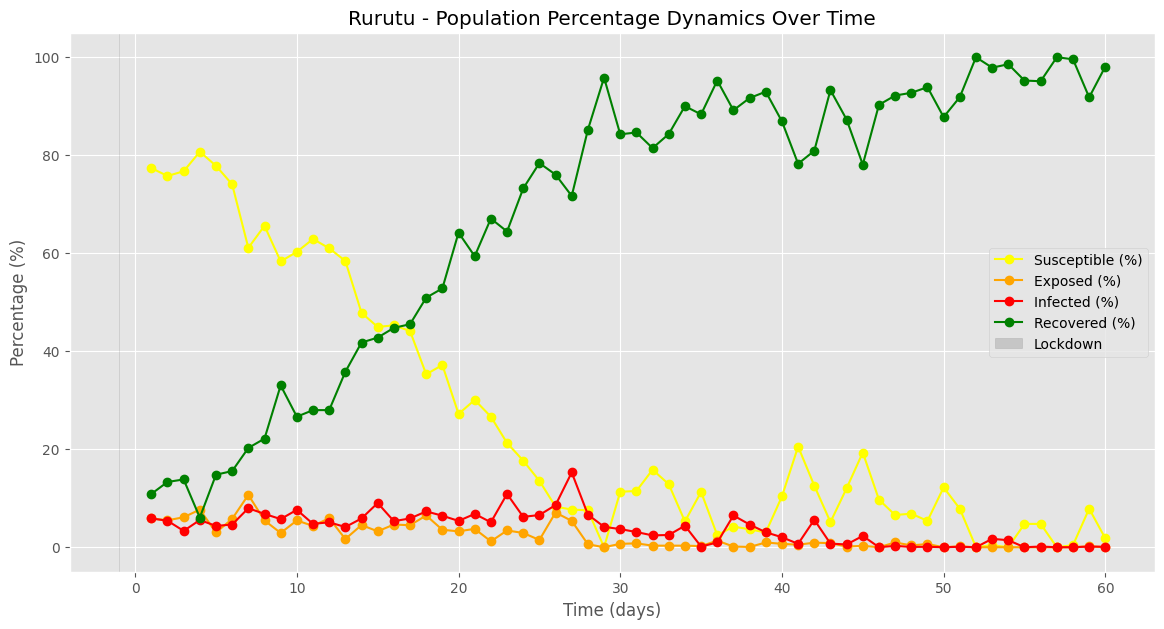

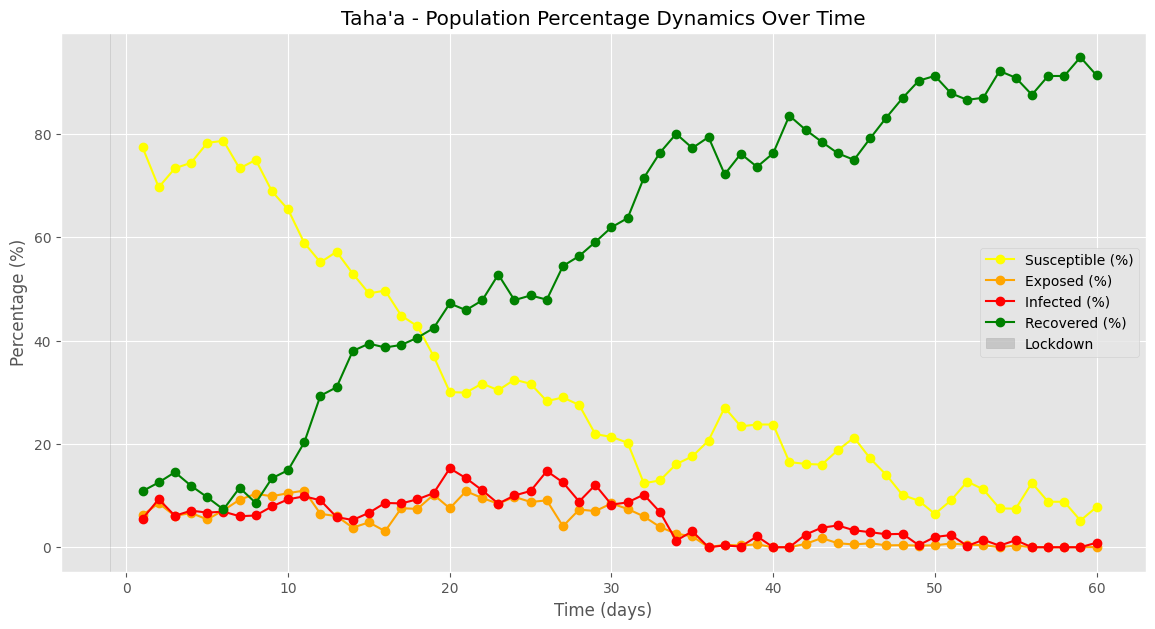

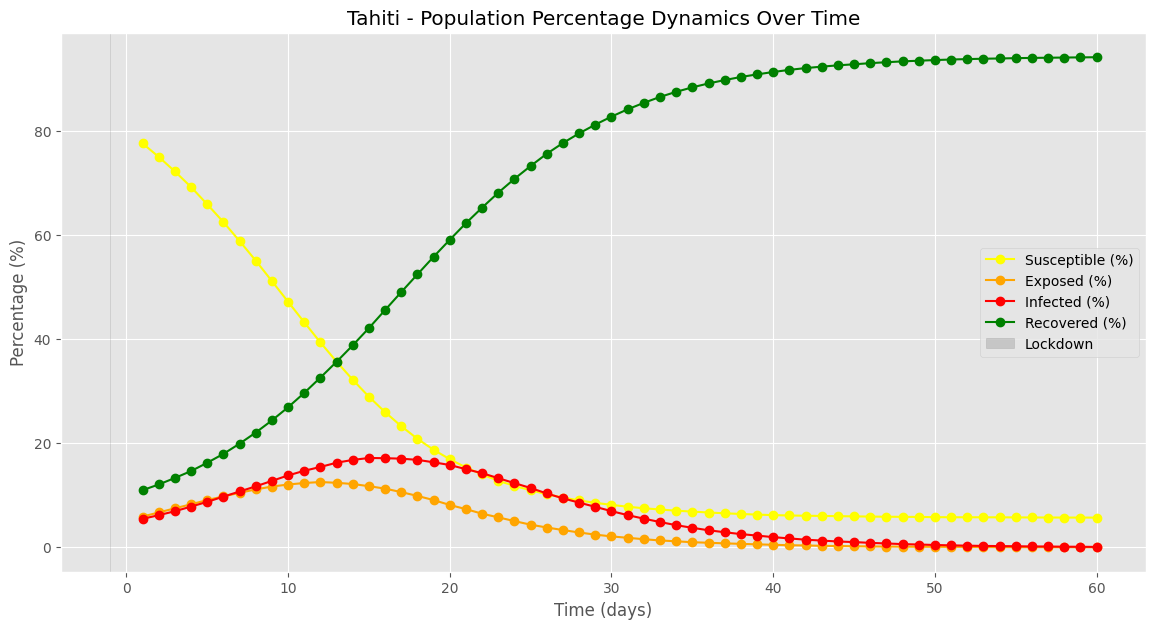

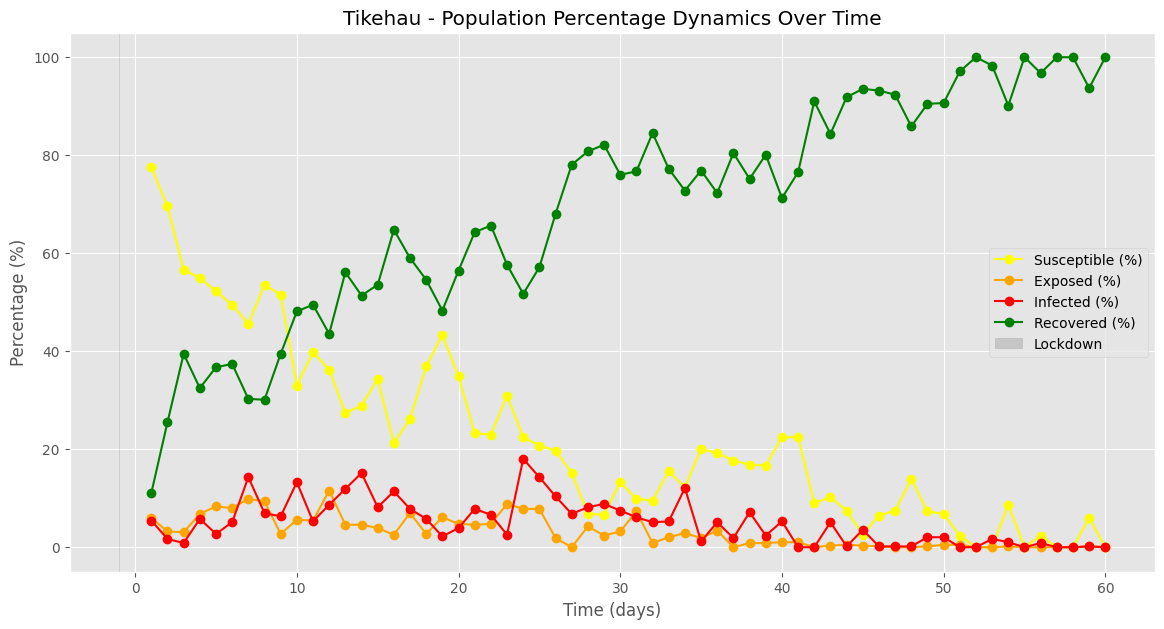

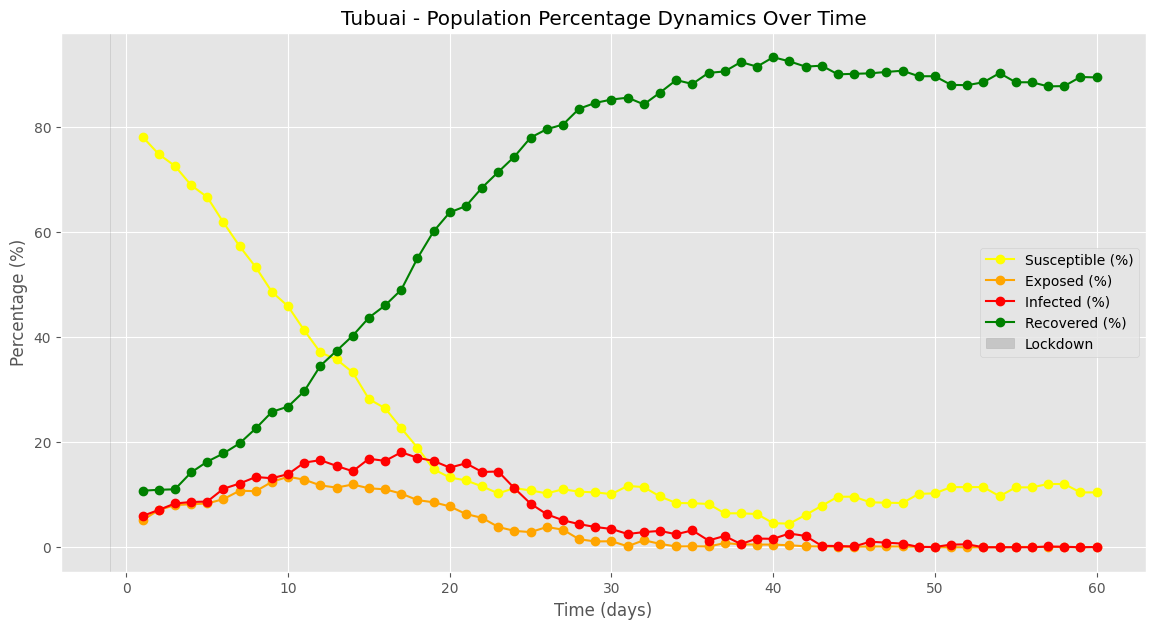

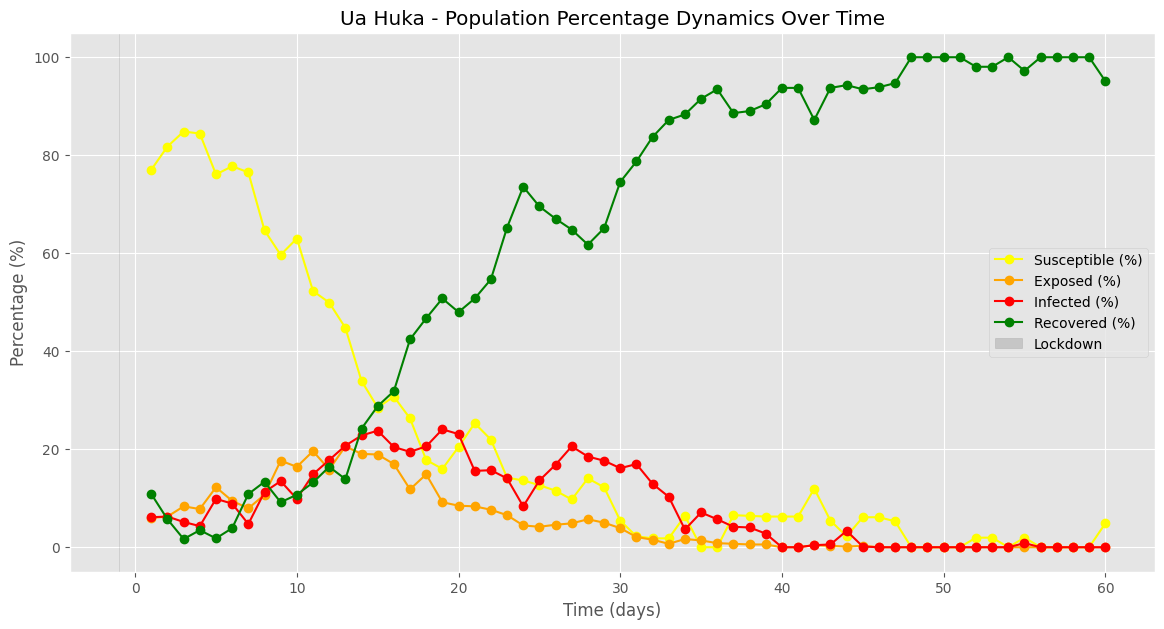

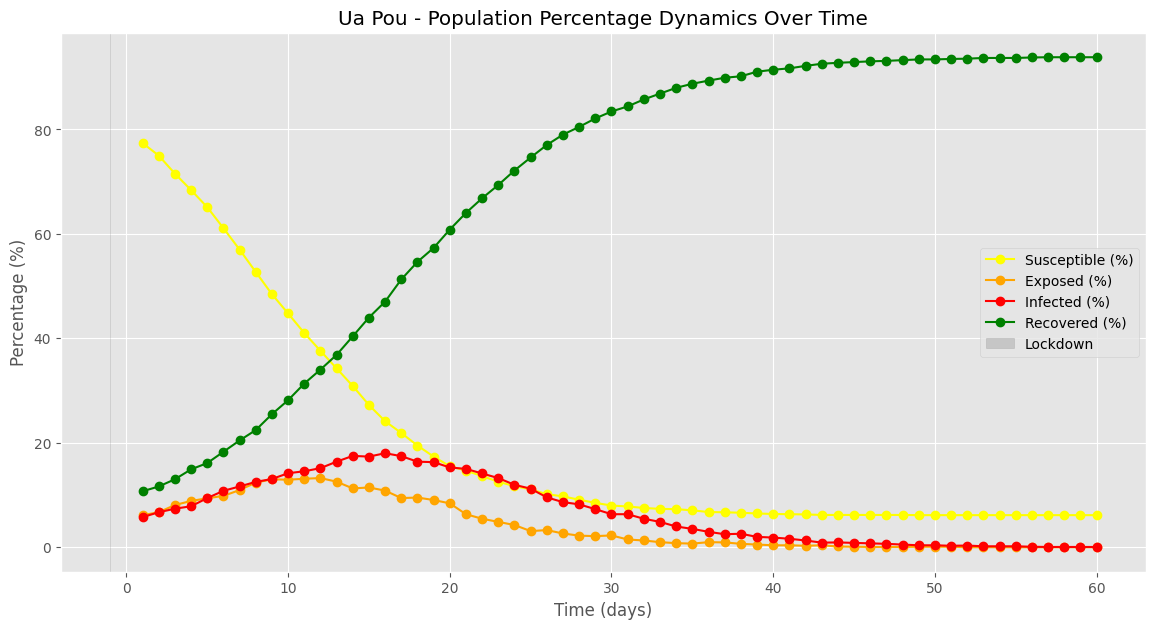

In [40]:
# Labels for percentage categories
compartment_percentage_labels = ['Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Lockdown parameters to mark on the chart
lockdown_start = parameters['ls'] - 1  # Adjust for zero-based indexing
lockdown_end = parameters['le'] + lockdown_start

# Iterate over each community to create a graph
for community in communities:  # Ensure 'communities' excludes "Outside World"
    plt.figure(figsize=(14, 7))

    # Loop through each compartment percentage label
    for label, color in zip(compartment_percentage_labels, compartment_colors):
        # Select the percentage data for the current community and compartment
        community_data = all_communities_df.loc[community]
        days = community_data.index
        percentages = community_data[label]

        plt.plot(days, percentages, label=label, color=color, marker='o')

    # Adjust axes and add title and labels
    plt.title(f"{community} - Population Percentage Dynamics Over Time")
    plt.xlabel("Time (days)")
    plt.ylabel("Percentage (%)")

    # Highlight the lockdown period
    plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

    # Add legend
    plt.legend()

    # Display the graph
    plt.show()